# i. Perkanalan

Nama : Akbar Fitriawan  
Batch : HCK-15


Datasets: Insurance Claims over Cars

Context : The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

Target : kolom "outcome" adalah 1, itu berarti pelanggan telah mengajukan klaim . Sedangkan jika nilai adalah 0, itu berarti pelanggan tidak mengajukan klaim.

Column | Name | Data type
--- | --- | ---
ID | Identitas unik untuk setiap entri dalam dataset mewakili induvidu client | 
AGE | usia dari pemilik atau pengemudi mobil yang terdaftar dalam klaim asuransi. | ordinal 
GENDER | jenis kelamin dari individu yang terlibat dalam klaim asuransi. | nominal
RACE | Merupakan kolom yang memuat informasi tentang ras atau etnisitas dari individu yang terlibat dalam klaim asuransi. | nominal
DRIVE_EXPERIENCE | kolom yang mencatat lama pengalaman mengemudi dari individu yang terlibat dalam klaim asuransi, mungkin dalam jumlah tahun. | ordinal
EDUCATION | tingkat pendidikan dari pemilik atau pengemudi mobil yang terlibat dalam klaim asuransi. | ordinal
INCOME | kolom yang memuat informasi tentang pendapatan individu yang terlibat dalam klaim asuransi. | continuous
CREDIT_SCORE | Kolom ini mencatat skor kredit dari individu yang terlibat dalam klaim asuransi, yang dapat mencerminkan stabilitas keuangan dan kecenderungan pembayaran. | continous
VEHICLE_OWNERSHIP | Ini adalah kolom yang mencatat apakah individu tersebut adalah pemilik kendaraan atau bukan. | discrete
VEHICLE_YEAR | Merupakan kolom yang mencatat tahun pembuatan kendaraan yang terlibat dalam klaim asuransi. | nominal
MERRIED | Status menikah | nominal
CHILDREN | Jumlah anak yang terlibat dalam klaim asurasi | nominal
POSTAL_CODE | Kolom ini berisi kode pos tempat tinggal individu yang terlibat dalam klaim asuransi. | discrete
ANNUAL_MILLAGE | Merupakan kolom yang mencatat perkiraan jarak tempuh tahunan kendaraan yang terlibat dalam klaim asuransi. | continous
VEHICLE_TYPE | Ini adalah kolom yang mencatat jenis kendaraan yang terlibat dalam klaim asuransi, misalnya sedan, SUV, truk, dll. | nominal
SPEEDING_VIOLATIONS | Kolom ini mencatat jumlah pelanggaran kecepatan yang dilakukan oleh individu yang terlibat dalam klaim asuransi. | discrete
DUIS | Merupakan kolom yang mencatat apakah individu yang terlibat dalam klaim asuransi pernah ditangkap karena mengemudi dalam keadaan mabuk atau di bawah pengaruh zat terlarang. ( "Driving Under the Influence of Substance") | discrete
PAST_ACCIDENT | Ini adalah kolom yang mencatat apakah individu pernah yang terlibat dalam klaim. | discrete
OUTCOME | "Target", Kolom ini berisi hasil dari klaim asuransi, mungkin berupa informasi tentang klaim yang diajukan, status klaim, atau tidak | nominal


**Conceptual Problems**

- Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Jelaskan apa yang dimaksud dengan Cross Validation !

Jawab:  

- bagging adalah teknik ensamble learning untuk meningkatkan kinerja model dengan cara penggantian (boostrap) di beberapa subset acak dan melatih model di setiap subset tersebut. latar belakang atau tujuan untuk mengurangi varians model dan mencegah overfitting

- perbedaan random forest dan algoritma boosting adalah dalam cara bagaimana mereka menghasilkan subset data pelatihan dan menggabungkan model-modelnya. ya algoritma random forest (bagging) bekerja dengan paralel sedangkan bosting (pelatihan berurutan model) dalam peningkatan berfokus pada perbaikan kesalahan model sebelumnya.

- Cross Validation adalah sebuah teknik yang digunakan untuk mengevaluasi kinerja suatu model machine learning dengan cara membagi dataset menjadi subset-subset yang lebih kecil

---

# ii. Import Libraries

In [85]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr


# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# libraries Data Preprocessing
from sklearn.model_selection import train_test_split # splittingdata
from feature_engine.outliers import Winsorizer # outlier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler # scalling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # encoder
from imblearn.over_sampling import SMOTE # balancing
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# lib pipelines
from sklearn.pipeline import Pipeline


# Pemodelan ML
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

from collections import Counter


# Save model
import pickle
import joblib
import json


# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

---

# iii. Data Loading

In [86]:
# load data
df = pd.read_csv('Car_Insurance_Claim.csv')
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [87]:
# Checking sizes
print('Jumlah Baris: ',df.shape[0])
print('Jumlah Kolom: ',df.shape[1])

Jumlah Baris:  10000
Jumlah Kolom:  19


In [88]:
# Data 5 teratas 
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [89]:
# Data 5 Terbawah
df.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [90]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

**Note**:
- Dataset memiliki `10000` jumlah baris dan `19` jumlah kolom
- Data type float64(6), int64(5), object(8) dan ada data tidak sesuai dengan kontex
- Terlihat ada missing value di 'credit score' dan 'Annual_mileage'
- ID tidak digunakan karena tidak ada informasi yang dapat diambil

jadi, kita harus merubah tipe data dan mungkin menambah column

In [91]:
# Drop ID tidak dibutuhkan
df.drop(columns='ID', inplace=True)

In [92]:
# Change Data type
df[['VEHICLE_OWNERSHIP','MARRIED','CHILDREN','OUTCOME']] = df[['VEHICLE_OWNERSHIP','MARRIED','CHILDREN','OUTCOME']].astype(int)

In [93]:
# checking postal code
df["POSTAL_CODE"].unique()

array([10238, 32765, 92101, 21217], dtype=int64)

Setelah melakukan pencarian di internet berdasarkan postal code adalah sebagai berikut:

City | Postal Code
--- | ---
New York- NY | 10238
Orlando - Florida | 32765
San Diego - California | 92101
Baltimore - Maryland | 21217

Dalam hal ini saya akan merubah postal code menjadi wilayah tersebut.

In [94]:
df['DRIVING_EXPERIENCE'].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [95]:
df['AGE'].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [96]:
# Change to clear categorical
df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].replace(['0-9y', '10-19y', '20-29y', '30y+'], ["newbie","amateure","advanced","expert"])
df['AGE'] = df['AGE'].replace(['65+', '16-25', '26-39', '40-64'], ["very old","young","middle age","old"])

Catatan !

Age 
- 16-25 : young
- 26-39 : middle age
- 40-64 : old
- 65+ : very old

Driving Experience
- 0-9y : "newbie"
- 10-19y : "amateure"
- 20-29y :  "advanced"
- 30+ : "expert"




In [97]:
df['AGE'].unique()

array(['very old', 'young', 'middle age', 'old'], dtype=object)

In [98]:
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,very old,female,majority,newbie,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,young,male,majority,newbie,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,young,female,majority,newbie,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,young,male,majority,newbie,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,middle age,male,majority,amateure,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,middle age,female,majority,amateure,university,upper class,0.582787,1,before 2015,0,0,10238,16000.0,sedan,0,0,1,0
9996,middle age,female,majority,amateure,none,middle class,0.522231,1,after 2015,0,1,32765,NaN,sedan,1,0,0,0
9997,middle age,male,majority,newbie,high school,middle class,0.470940,1,before 2015,0,1,10238,14000.0,sedan,0,0,0,0
9998,middle age,female,majority,amateure,high school,poverty,0.364185,0,before 2015,0,1,10238,13000.0,sedan,2,0,1,1


In [99]:
# Change column postal code to city
def changePostalCode(postal_code):
    if postal_code == 10238:
        return "new york"
    elif postal_code == 32765:
        return "orlando"
    elif postal_code == 92101:
        return "san diego"
    else:
        return "baltimore"
    
df["CITY"] = df["POSTAL_CODE"].apply(changePostalCode)

# so, drop column "POSTAL_CODE"
df.drop(columns="POSTAL_CODE", axis=1, inplace=True)

In [100]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CITY
0,very old,female,majority,newbie,high school,upper class,0.629027,1,after 2015,0,1,12000.0,sedan,0,0,0,0,new york
1,young,male,majority,newbie,none,poverty,0.357757,0,before 2015,0,0,16000.0,sedan,0,0,0,1,new york
2,young,female,majority,newbie,high school,working class,0.493146,1,before 2015,0,0,11000.0,sedan,0,0,0,0,new york
3,young,male,majority,newbie,university,working class,0.206013,1,before 2015,0,1,11000.0,sedan,0,0,0,0,orlando
4,middle age,male,majority,amateure,none,working class,0.388366,1,before 2015,0,0,12000.0,sedan,2,0,1,1,orlando


Terlihat bahwa data sudah menjadi apa yang kita inginkan selanjutnya check statistik sederhana.

Ekstrak info:
- VEHICLE_OWNERSHIP Values : no = 0, yes = 1
- MARRIED values: no = 0, yes = 1
- CHILDREN values : no = 0, yes = 1
- OUTCOME values : no claim insurance = 0, yes = claim insurance

In [101]:
# Deskripsi
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Cek deskripsi kumpulan data yang menjelaskan nilai minimum, nilai maksimum, nilai rata-rata, jumlah total, standar deviasi, dll. terlihat rata-rata pernah melakukan pelanggaran kecepatan adalah 1 artinya induvidu `"pernah satu kali pelanggaran lalu lintas dari kecapatan"`, `"PAST_ACCIDENT" (pernah mengajukan klaim) rata-rata 1 kali pernah`, `"VEHICLE_OWNERSHIP" bukan milik sendiri`, dan rata-rata `Outcome "0" ("Tidak mengajukan klaim")`.

In [102]:
df.describe(include=['object'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,CITY
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2,4
top,middle age,female,majority,newbie,high school,upper class,before 2015,sedan,new york
freq,3063,5010,9012,3530,4157,4336,6967,9523,6940


Dari hasil fungsi describe terlihat bahwa top frekuensi dari dataset adalah wanita berusia `"26-39 tahun"`, memiliki pengalaman` kurang dari "10 tahun"`, dengan income `"upper_class"`, mobil `sebelum tahun 2015`, jenis mobil `sedan` dan city kebanyakan di `"New York"`

---

# iv. Exploratory Data Analysis (EDA)

In [103]:
# dump dataset agar tidak mengulang
data = df.copy()


In [104]:
# dump datasets
data.to_csv('datasets/Car_Insurance_Claim_Cleaned.csv', index=False)

**Checking distribusi di kolom target kita**

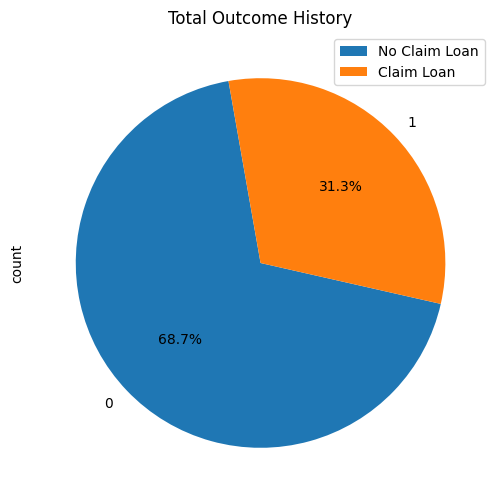

In [105]:
# Distribution Data attration employee
plt.figure(figsize=(8,6))
dist_outcome = data["OUTCOME"].value_counts()
dist_outcome.plot(kind='pie', autopct='%1.1f%%', startangle=100)
plt.title('Total Outcome History')
plt.legend(labels=["No Claim Loan", "Claim Loan"])


plt.show()

Dari hasil visualisasi terlihat bahwa column Outcome yang mana target kita, data cukup tidak seimabang sehingga harus melakukan balancing 

**Checking Distribusi Data Categorical**

In [106]:
data.AGE.unique()

array(['very old', 'young', 'middle age', 'old'], dtype=object)

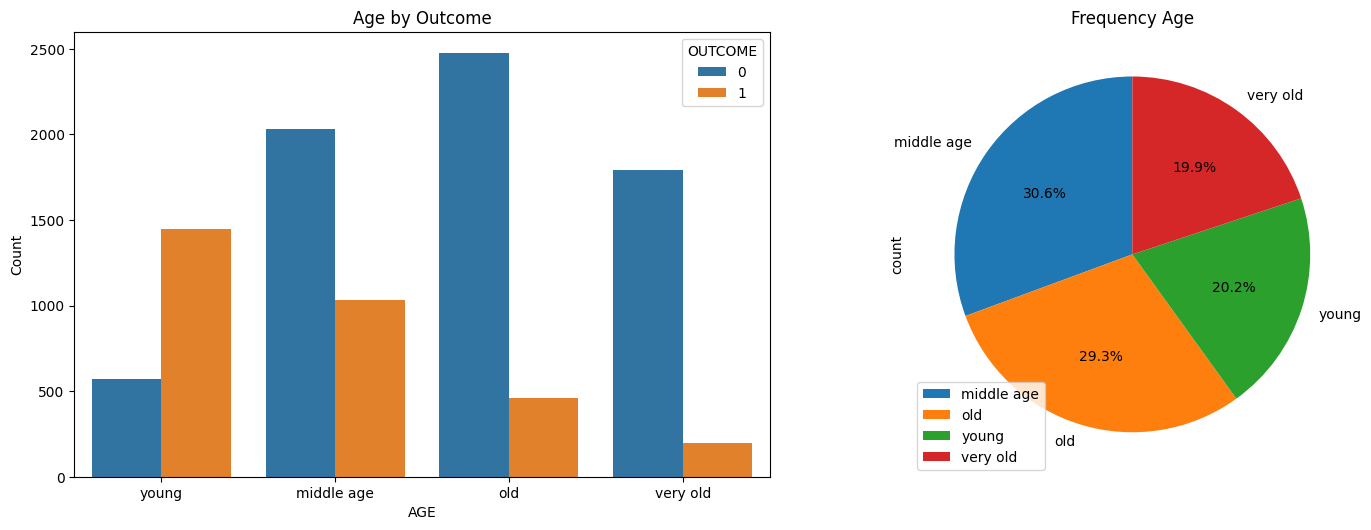

In [107]:
# Viualisasi Age
plt.figure(figsize=(15,10))
age_label=['young','middle age','old','very old']
plt.subplot(2,2,1)
sns.countplot(data=data,x=data["AGE"], hue='OUTCOME', order=age_label)
plt.ylabel("Count")
plt.title("Age by Outcome")

plt.subplot(2,2,2)
dist_age = data["AGE"].value_counts()
dist_age.plot(kind="pie", autopct='%1.1f%%', startangle=90, subplots=True)
plt.legend(loc="lower left")
plt.title("Frequency Age")

plt.tight_layout()
plt.show()



In [108]:
data['AGE'].value_counts()

AGE
middle age    3063
old           2931
young         2016
very old      1990
Name: count, dtype: int64

Penjelasan:

- Terlihat bahwa Age by Outcome, dimana Outcome 0 (No Claims loan) unggul di rentang "`usia 26 - 65+ tahun`", sedangkan Outcome 1 (Claim loan) di rentang usia `16-25 tahun`. terlihat kenaikan dan penurunan semakin tua semakin tidak mengajukan claim (No Claim Loan ) dan sebaliknya Outcome 1
- Dan frequency Age di dataset Usia remaja ("16-25 tahun") yaitu `20.2%`, di usia dewasa("26-39 tahun") adalah` 30.6%` , di usia paruh baya ("40-64 tahun") adalah `29.3%`, dan di usia lansia ("65+") adalah `19.9%`.

insight:
- Pada rentang usia `16-25` tahun (young) terdapat kecenderungan mengajukan klaim asuransi (1), sedangkan pada rentang usia `40-64` tahun (old) terdapat kecenderungan tidak mangajukan klaim (0)."
- Tingginya frekuensi tidak mengajukan klaim asuransi pada rentang usia `40-64` tahun. (old)
- Ringkasnya, seiring bertambahnya usia, ada kecenderungan untuk tidak mengajukan klaim asuransi.
- relate dengan drive experience di mana usia tersebut di kategorikan newbie, amateure, advanced, dan expert


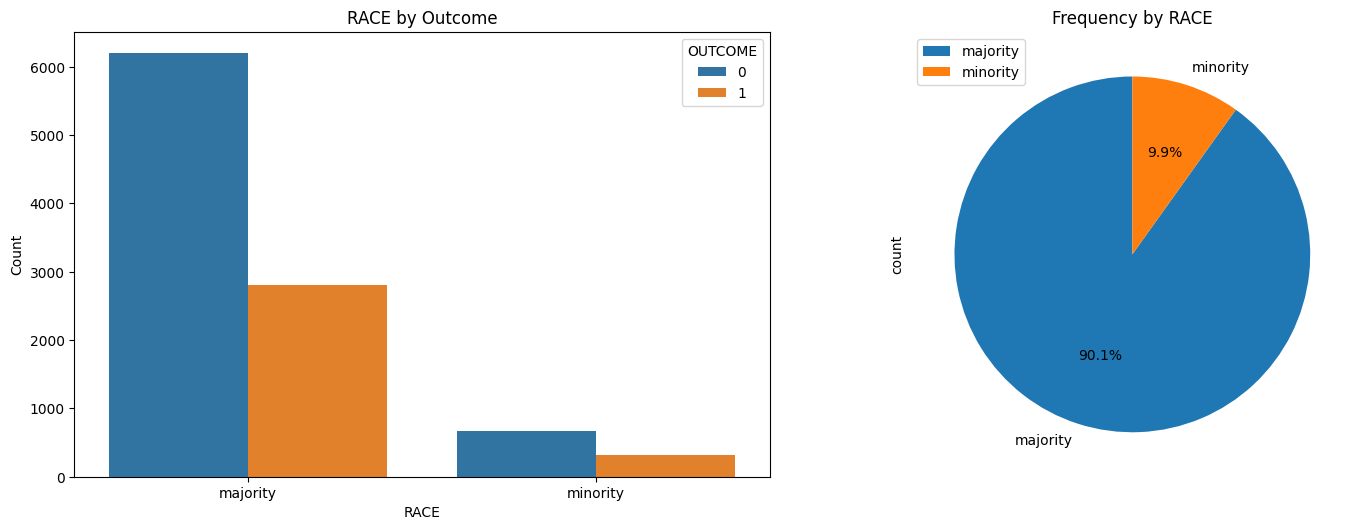

In [109]:
# Viualisasi RACE
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data=data,x=data["RACE"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("RACE by Outcome")

plt.subplot(2,2,2)
dist_race = data["RACE"].value_counts()
dist_race.plot(kind="pie", autopct='%1.1f%%', startangle=90, subplots=True)
plt.legend(loc="upper left")
plt.title("Frequency by RACE")

plt.tight_layout()
plt.show()


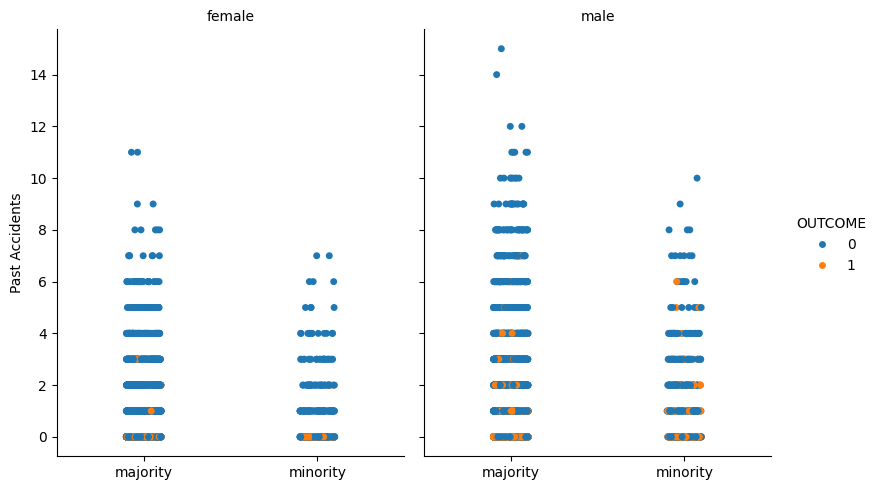

In [110]:
fig = sns.catplot(data=data, x="RACE", y="PAST_ACCIDENTS", hue="OUTCOME", col="GENDER",kind='strip', aspect=.8)
fig.set_axis_labels("", "Past Accidents")
# fig.set_xticklabels(['poverty', 'working class', 'middle class', 'upper class'])
fig.set_titles("{col_name}")
fig.tight_layout()


Penjelasan:
- Terlihat dari ras mayoritas dan minoritas Outcome 0 ("No claim loan") lebih unggul dibandingkan dengan Outcome 1 ("Claim loan")
- majority 90.1% dan minority 9.9%

insight: 
- Pengukuran resiko : sentiment terhadap rasisme, Ada kemungkinan bahwa pola klaim atau risiko claim loan kelompok ras atau etnis, ya rasisme
- faktanya tidak ada korelasi antara majority dan minority (jika kita bayangkan bahwa besar kemungkinan minority lebih bersiko atau lebih tinggi terhadap Outcome 1 "Claim Loan" yaitu rasisme)

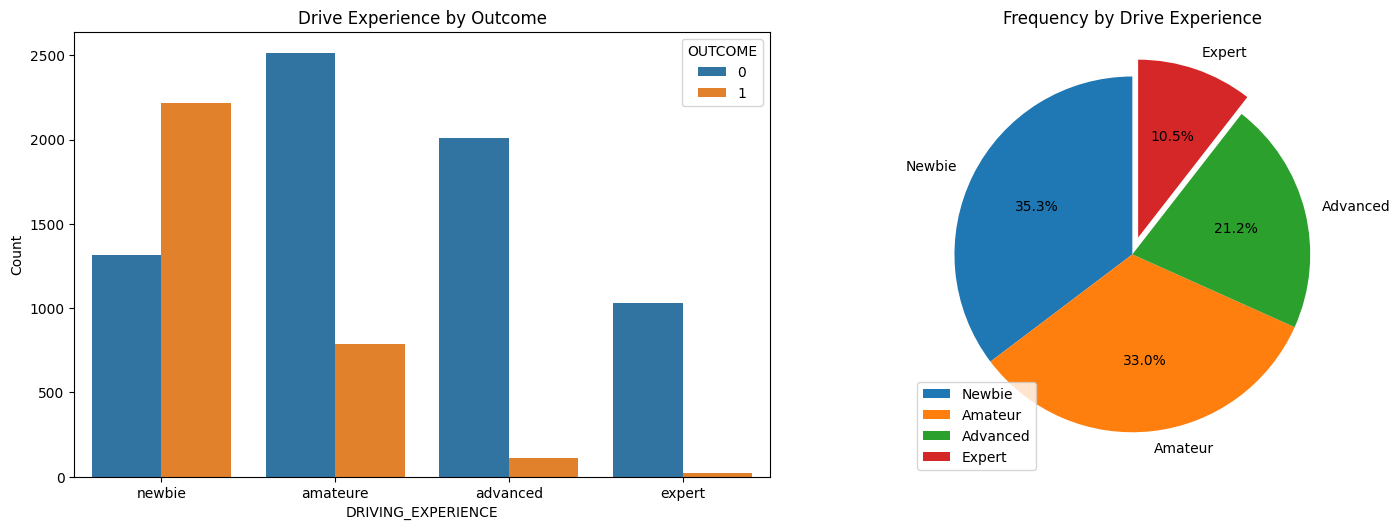

In [111]:
# Viualisasi Drive experince
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data=data,x=data["DRIVING_EXPERIENCE"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("Drive Experience by Outcome")

plt.subplot(2,2,2)
dist_driveExp = data["DRIVING_EXPERIENCE"].value_counts()
labels = ["Newbie", "Amateur", "Advanced", "Expert"]
explode = (0, 0, 0, 0.1)

plt.pie(dist_driveExp, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Frequency by Drive Experience")

# Menambahkan legenda khusus untuk subplot ini
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

Penjelasan:

- Faktanya semakin kurang berpengalaman dalam mengemudi semakin tinggi mengajukan klaim  asuransi (Outcome 1 "Claim loan").
- Dalam dataset frequency Drive experience tinggi di 0-9 tahun yaitu 35%, di susul 10-19 tahun adalah 33.0%, 20-29 tahun adalah 21.2%, 30+ tahun adalah 10.5%. jadi merename value ['Newbie', 'Amateure', 'Advanced', 'Expert']

insight:
- Faktanya semakin kurang berpengalaman dalam mengemudi semakin tinggi mengajukan klaim (Outcome 1 "Claim loan").
- Di Dataset Newbie lebih dominan artinya besar kemungkinan mengajukan claim (Outcome 1 ) 

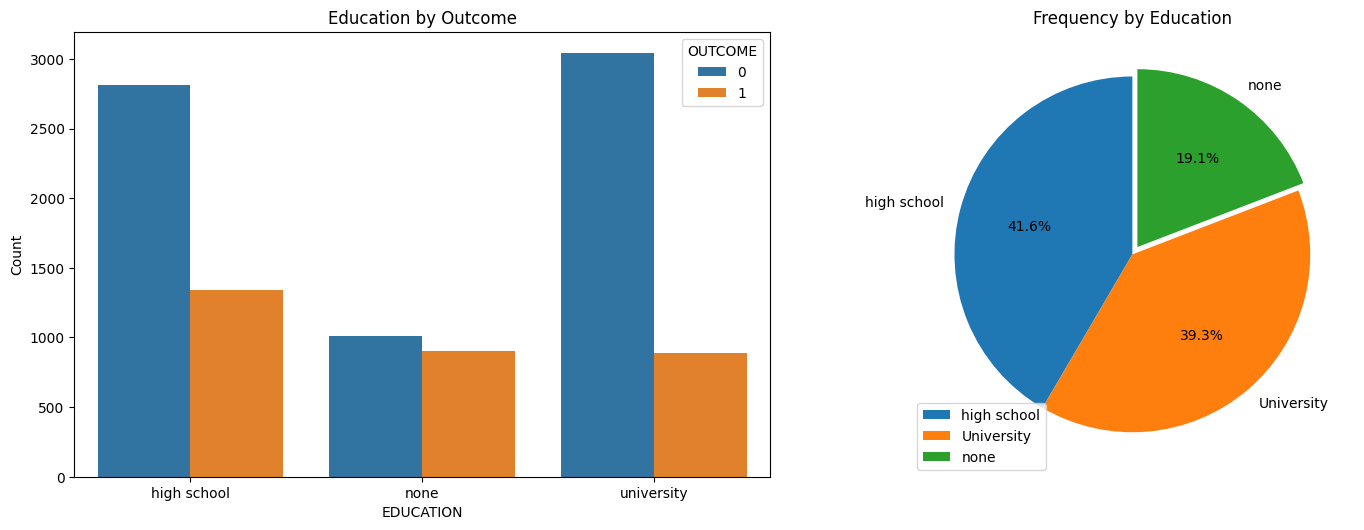

In [112]:
# Viualisasi Education level
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data=data,x=data["EDUCATION"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("Education by Outcome")

plt.subplot(2,2,2)
dist_education = data["EDUCATION"].value_counts()
labels = ["high school", "University","none"]
explode = (0, 0, 0.05)

plt.pie(data["EDUCATION"].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Frequency by Education")

# Menambahkan legenda khusus untuk subplot ini
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

Penjelasan:

- Dari visualisasi menunjukkan Outcome 1 (claim insurance) tingginya frequency di `high school` sedangkan Outcome 0 (No claim insurance) di `university`
- Dan besaran data di dataset adalah `45%` di high school, `39%` di University dan `19.1%` adalah none (bekerja, dll)

insight:
- Relate dengan Age dimana tingkat pendidikan high school (usia 16-25 tahun) cenderung mengajukan klaim (Outcome 1 "Claim loan"), serta frekuensi tinggi di kategori tersebut
- dan saya asumsikan bahwa high school di rentang usia 16-25 tahun, university di rentang usia 26-39 tahun, dan none rentang usia 40-65+


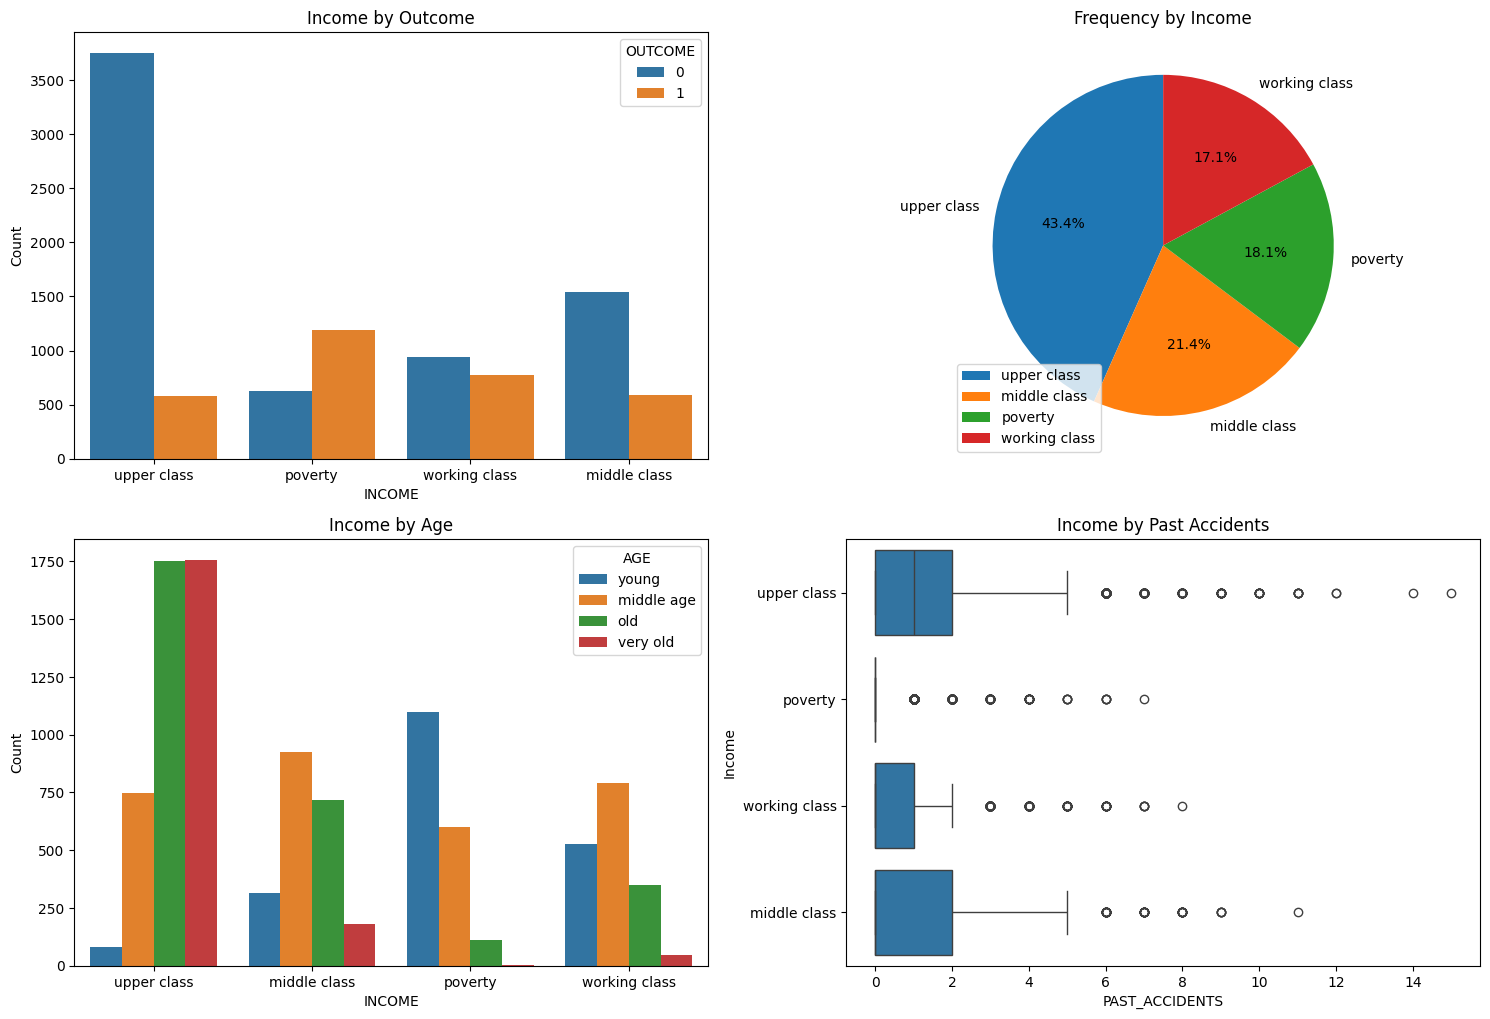

In [113]:
# Viualisasi Education level
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(data=data,x=data["INCOME"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("Income by Outcome")

plt.subplot(4,2,2)
dist_income = data["INCOME"].value_counts()
labels = ["upper class", "middle class","poverty","working class"]
# explode = (0, 0, 0.05)
plt.pie(dist_income, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Frequency by Income")
# Menambahkan legenda khusus untuk subplot ini
plt.legend(loc="lower left")

plt.subplot(4,2,3)
sns.countplot(data=data, x="INCOME", hue="AGE", order=labels, hue_order=age_label)
plt.ylabel("Count")
plt.title("Income by Age")


plt.subplot(4,2,4)
sns.boxplot(data=data, x="PAST_ACCIDENTS", y="INCOME" )
plt.ylabel("Income")
plt.title("Income by Past Accidents")

plt.tight_layout()
plt.show()

In [114]:
dist_income

INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64

Penjelasan:

- Berdasarkan visualisasi Income by Outcome bahwa yang cenderung mengajukan claim (outcome 1) adalah poverty ("miskin").
- Dari hasil frequency by income dataset di dominasi oleh upper class yaitu `43.4%`, disusul middle class `21.4%`, poverty `18.1%`, dan working class `17.1%.`
- Dari hasil output Income by Age terlihat Upper class di dominasi usia paruh baya ("40-64") dan tua ("65+"), middle class di dominasi usia dewasa("26-39"), Poverty di dominasi usia ("16-25"), dan working class di dominasi usia dewasa ("26-39")
- Dari hasil output Income by Past accidents bahwa Upper Class setidaknya pernah melakukan 1 kali claim loan ("outcome 1") bisa di lihat dari median 1.
untuk income Poverty cenderung tidak pernah, working class rata-rata pernah 1 kali claim namun jarang (tidak lebih banyak), middle class rata-rat pernah 2 kali (tidak lebih banyak) namun jarang.

Insight:
- Berdasarkan Outcome (claim loan / no claim loan) bahwa Income "Poverty" berpotensi untuk mengajukan klaim, yang mana di dominasi usia remaja. sehingga kita harus mengurangi potensi tersebut. dengan cara customer segmentasi dan menargetkan usia lebih dari 25 tahun dan dengan melihat penghasilannya (upper class, middle class, dan working class)

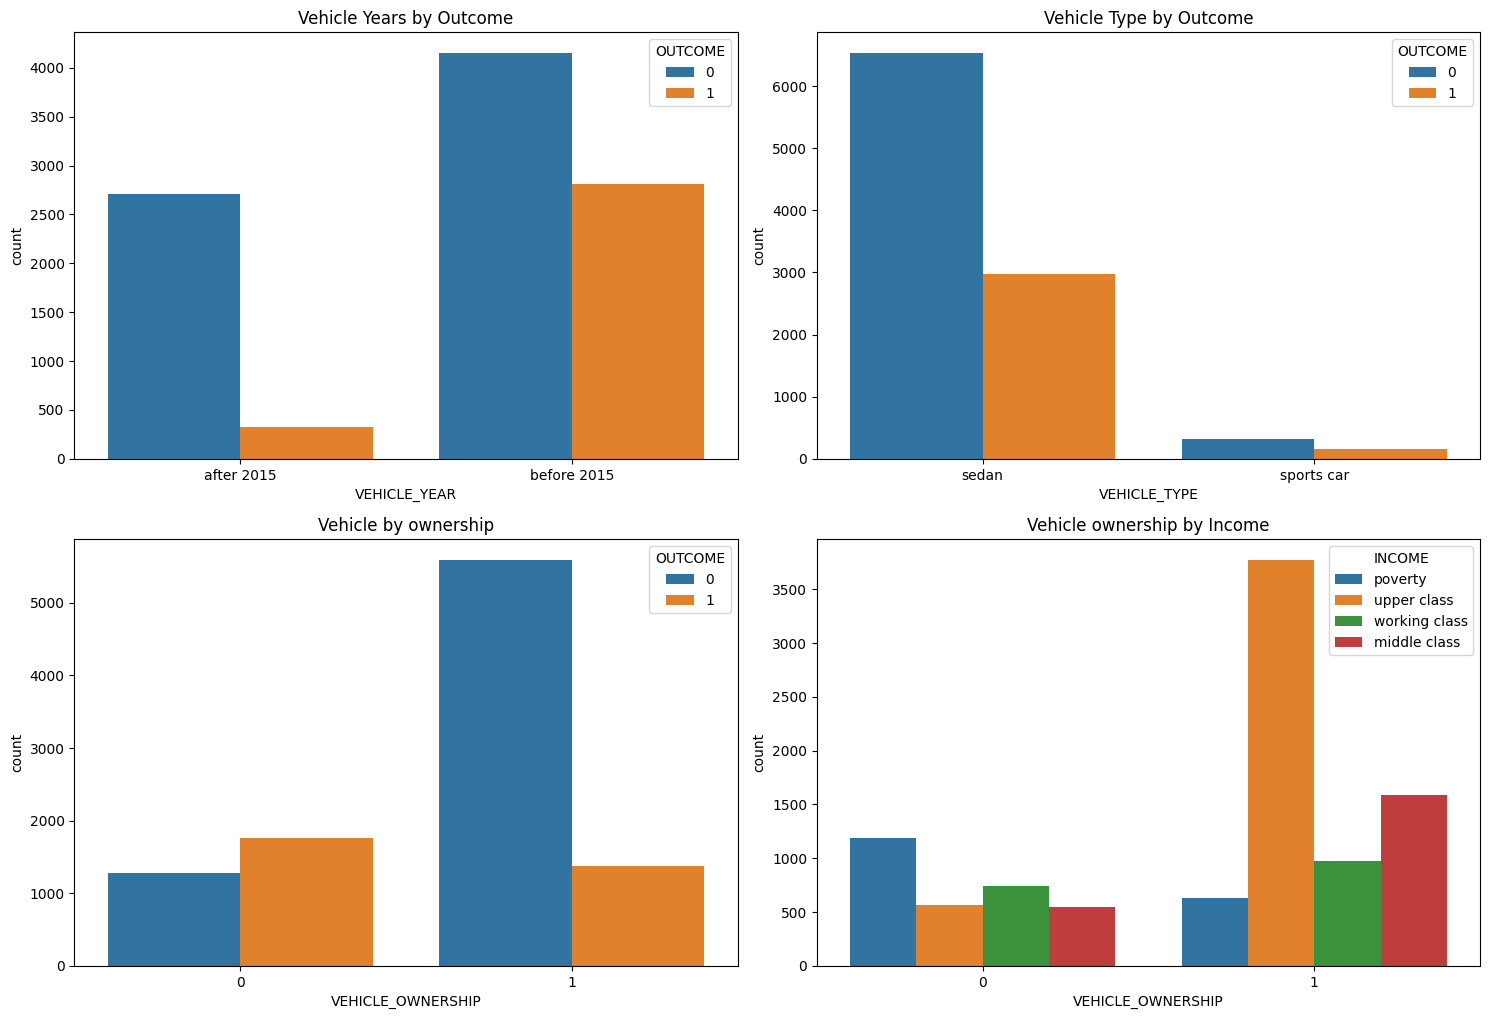

In [115]:
# Visualisasi Vehicle
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(data=data, x='VEHICLE_YEAR', hue="OUTCOME")

plt.title('Vehicle Years by Outcome')

plt.subplot(4,2,2)
sns.countplot(data=data, x="VEHICLE_TYPE", hue="OUTCOME")
plt.title("Vehicle Type by Outcome")

plt.subplot(4,2,3)
sns.countplot(data=data, x="VEHICLE_OWNERSHIP", hue="OUTCOME")
plt.title("Vehicle by ownership")

plt.subplot(4,2,4)
sns.countplot(data=data, x="VEHICLE_OWNERSHIP", hue="INCOME")
plt.title("Vehicle ownership by Income")
plt.tight_layout()
plt.show()

Penjelasan:

- Dari hasil visualisasi bahwa Outcome 1 (Claim insurance) cenderung mobil sebelum tahun 2015 (before 2015) jenis mobil sedan, dan kepemilikan mobil (bukan miliknya)
- Dari hasil visualisasi Vehicle by Outcome menunjukkan Outcome 1 (Claim loan) adalah sebelum tahun 2015 (before 2015) dan jenis mobil sedan. Dan sebaliknya berdasarkan penjelasan tersebut.
- Dari hasil visualisasi Vehicle Ownership (pemilik mobil) menunjukkan Outcome 0 (no claim loan) adalah pemilik mobil sendiri yang dimana penghasilan stabil (upper class). namun dalam frequency bukan pemilik mobil sendiri cenderung mengajukkan klaim

Insight:

- Terlihat dari sports car cenderung sadikit, lakukan campaign atau promotion untuk tipe mobil sports car. terutama di mobil tahun setelah 2015

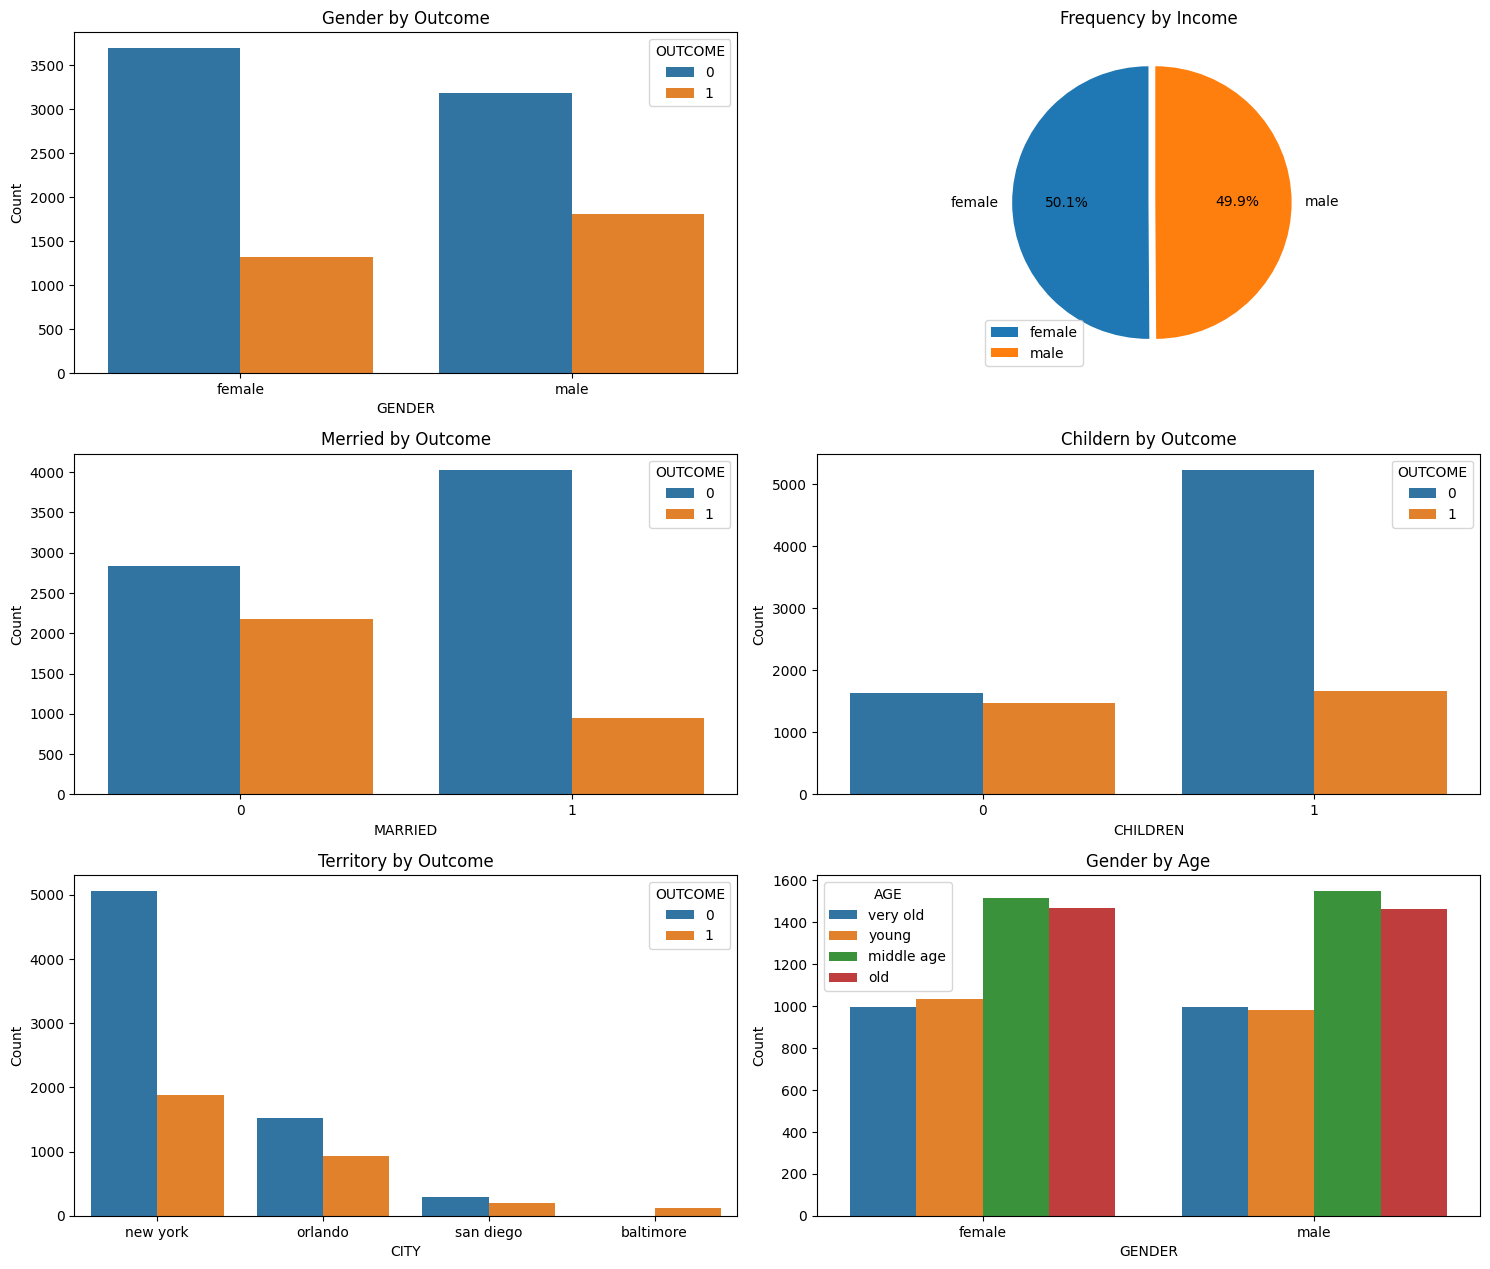

In [116]:
# Viualisasi Status Personal
plt.figure(figsize=(15,25))

plt.subplot(6,2,1)
sns.countplot(data=data, x=data["GENDER"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("Gender by Outcome")

plt.subplot(6,2,2)
dist_gender = data["GENDER"].value_counts()
labels = ["female", "male"]
explode = (0, 0.05)
plt.pie(dist_gender, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Frequency by Income")
# Menambahkan legenda khusus untuk subplot ini
plt.legend(loc="lower left")



plt.subplot(6,2,3)
sns.countplot(data=data, x=data["MARRIED"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("Merried by Outcome")


plt.subplot(6,2,4)
sns.countplot(data=data, x=data["CHILDREN"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("Childern by Outcome")

plt.subplot(6,2,5)
sns.countplot(data=data, x=data["CITY"], hue='OUTCOME')
plt.ylabel("Count")
plt.title("Territory by Outcome")

plt.subplot(6,2,6)
sns.countplot(data=data, x=data["GENDER"], hue='AGE')
plt.ylabel("Count")
plt.title("Gender by Age")



plt.tight_layout()
plt.show()

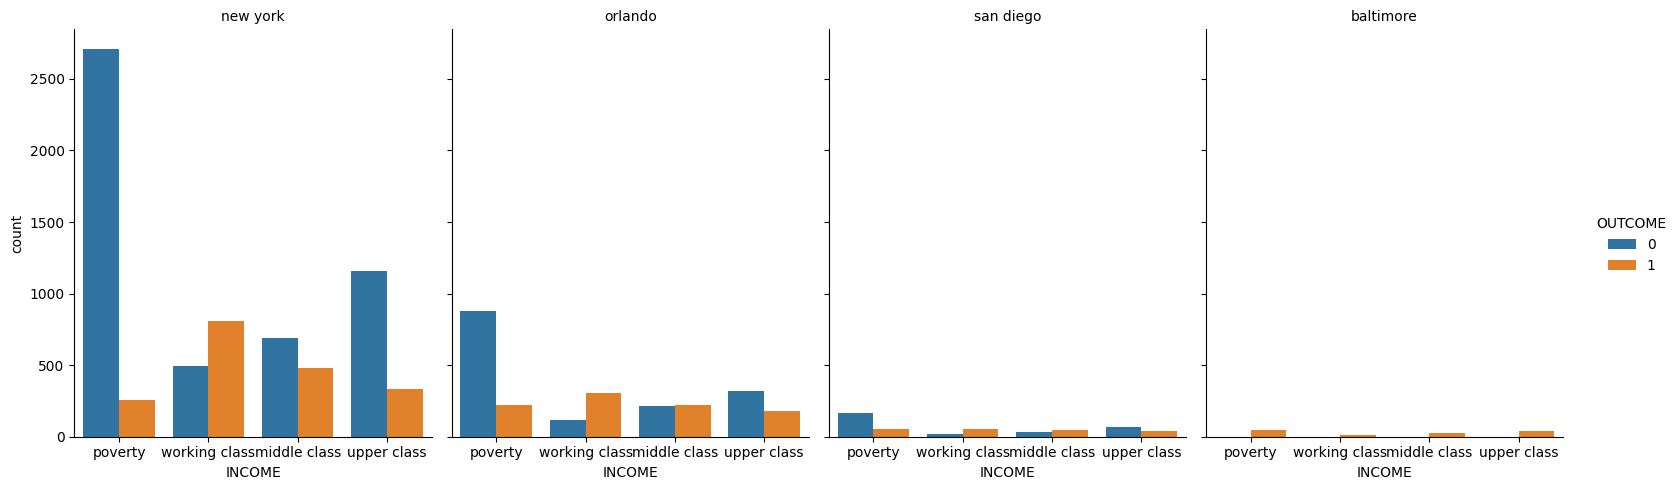

In [117]:
fig = sns.catplot(data=data, x="INCOME", hue="OUTCOME", col="CITY",kind='count', aspect=.8)
# fig.set_axis_labels("", "Credit Score")
fig.set_xticklabels(['poverty', 'working class', 'middle class', 'upper class'])
fig.set_titles("{col_name}")
fig.tight_layout()

Penjelasan:

- Berdasarkan visualisasi status personal dimana Outcome 1 (Claim insurance) adalah laki-laki, single, tidak ada perbedaan "memiliki anak atau tidak", dan berdasarkan City New york lebih tinggi, disusul Orlando, San diego, baltimore
- Berdasarkan  visualisasi status personal dimana Outcome 0 (No claim insurance) adalah cenderung perempuan, menikah, memiliki anak, dan city New York, orlando, san diego.
- Berdasarkan City rangking New york posisi pertama, Orlando kedua, San diego ketiga, terakhir baltimore
- Berdasarkan Gender by Age tidak ada perbedaan signifikan dalam frekuensi di dataset.

Insight: 
- Kita harus meningkatkan pelayanan di wilayah San diego dan Baltimore, dengan melakukan promosi campaign untuk menarik customer

**Checking Ditribusi Data Numerik**

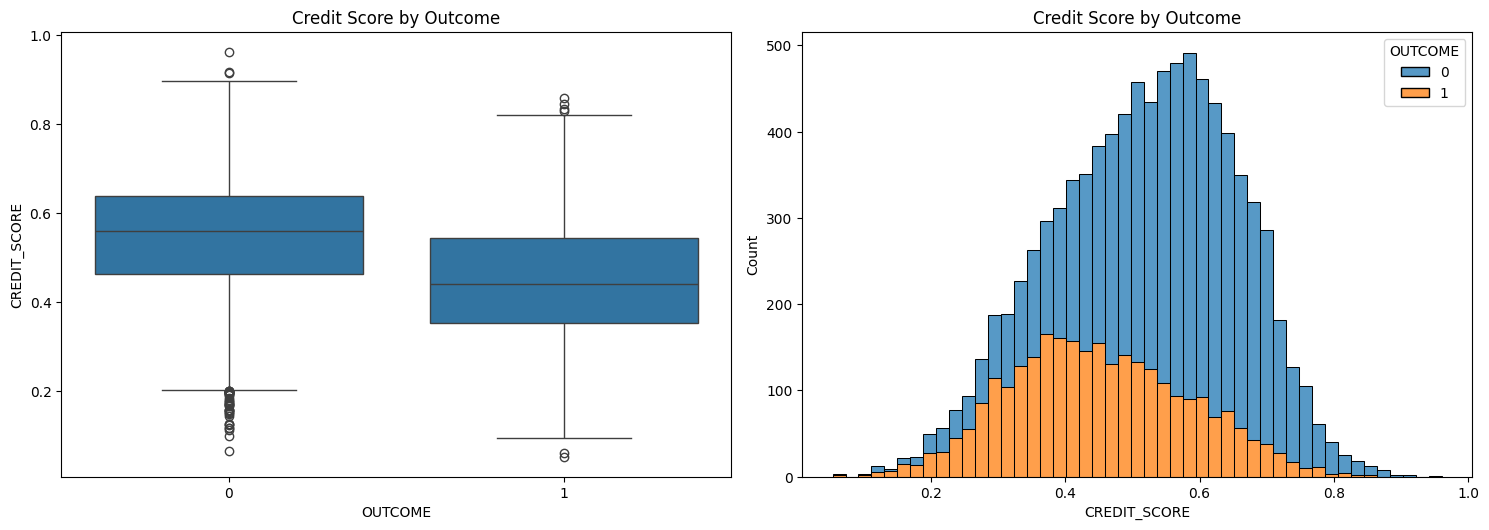

In [118]:
# Visualisasi Credit Score

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=data, x='OUTCOME', y='CREDIT_SCORE')
plt.title('Credit Score by Outcome')


plt.subplot(2,2,2)
sns.histplot(data=data, x='CREDIT_SCORE', hue='OUTCOME', multiple='stack')
plt.title('Credit Score by Outcome')


plt.tight_layout()
plt.show()


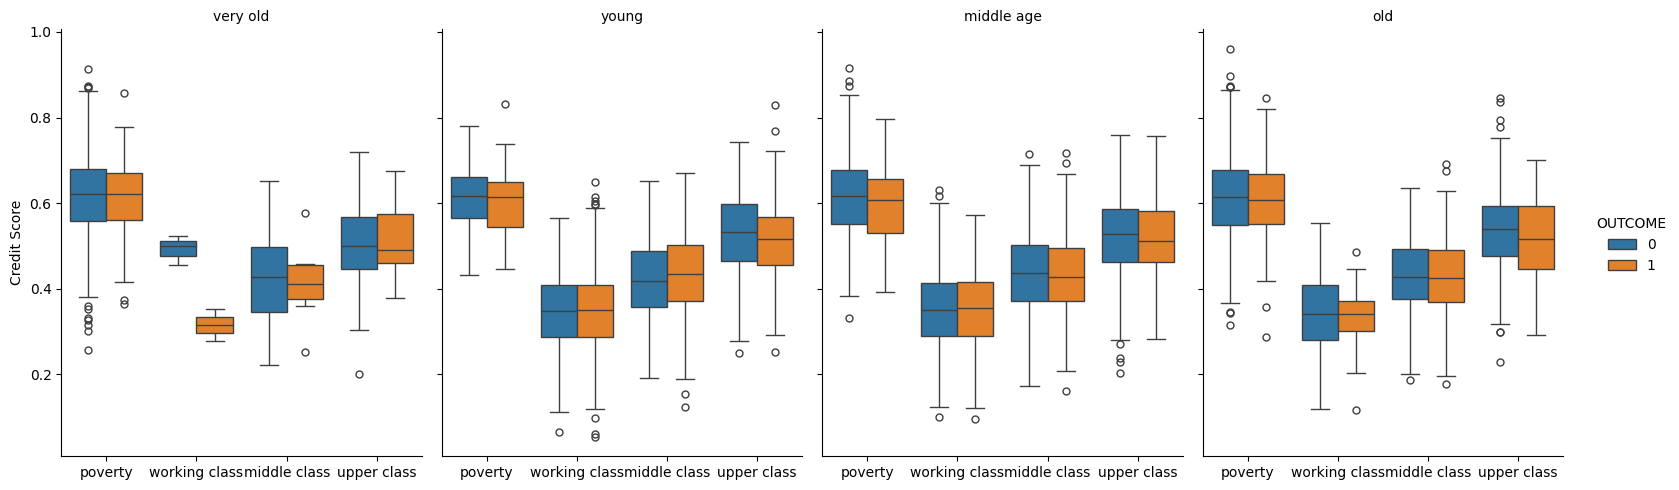

In [119]:
fig = sns.catplot(data=data, x="INCOME", y="CREDIT_SCORE", hue="OUTCOME", col="AGE",kind='box', aspect=.8)
fig.set_axis_labels("", "Credit Score")
fig.set_xticklabels(['poverty', 'working class', 'middle class', 'upper class'])
fig.set_titles("{col_name}")
fig.tight_layout()


In [120]:
out = data.groupby('OUTCOME')['CREDIT_SCORE'].mean()
out

OUTCOME
0    0.546092
1    0.449571
Name: CREDIT_SCORE, dtype: float64

Penjelasan:

- Berdasarkan hasil visualisasi bahwa Credit Score by Outcome, nilai outcome 0 (No claim insurance) lebih tinggi di bandingkan dengan Outcome 1 (Claim insurance). tingginya rata-rata di score 0.5 untuk Outcome 0 (No claim insurance), sedangkan Outcome 1 (Claim insurance) 0.4
- Dilihat dari Credit score by income and age rata-rata hasil berdasarkan kategori age bahwa Poverty('miskin') cenderung tinggi, disusul income upper class, middle class dan working class.

insight:
- Orang dengan nilai Credit Score yang lebih tinggi dan pendapatan yang lebih tinggi mungkin cenderung memiliki kecenderungan untuk tidak melakukan klaim asuransi (Outcome 0), sementara orang dengan pendapatan rendah mungkin memiliki nilai Credit Score yang lebih tinggi dan lebih cenderung untuk melakukan klaim asuransi (Outcome 1).

- Perusahaan dapat menyesuaikan strategi penetapan premi. Mereka dapat menawarkan diskon atau insentif kepada pelanggan dengan nilai credit score yang tinggi sebagai insentif untuk mempertahankan pelanggan.
- segmentasi credit score berdasarkan pendapatan pelanggan, dengan menargetkan pelanggan yang mana credit score tinggi dan pendapatan tinggi dengan cara memberikan tambahan pelayanan khusus atau premi yang menarik (contoh tambahan keamanan klaim dsb.)

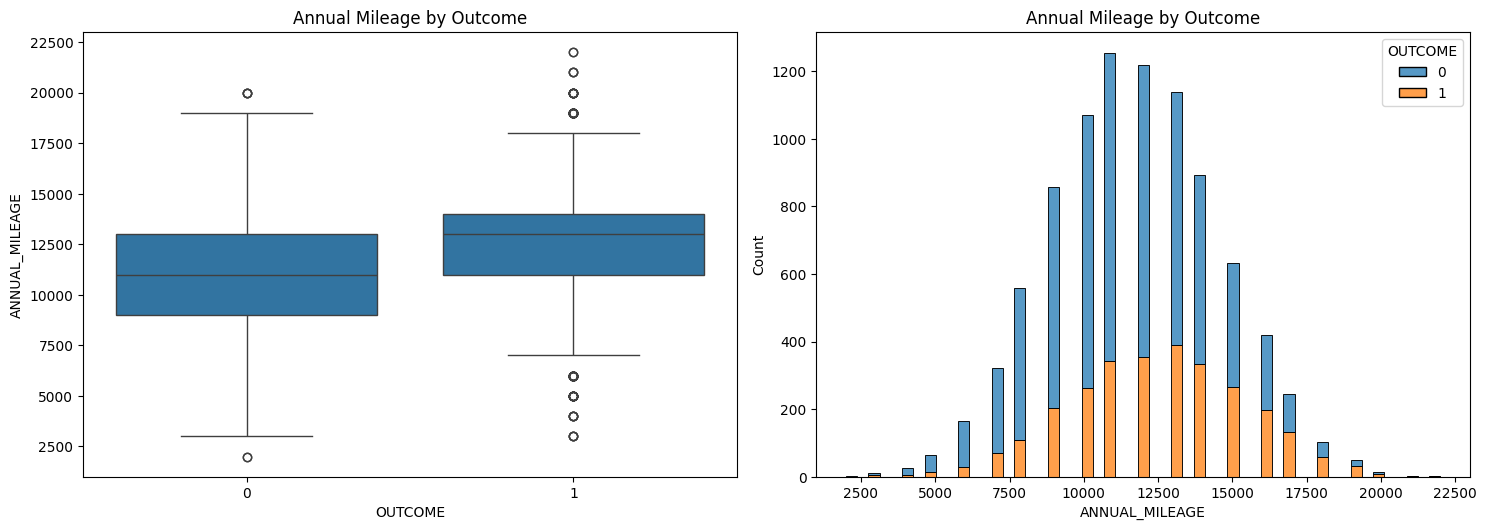

In [121]:
# Visualisasi  Annual millAge
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=data, x='OUTCOME', y='ANNUAL_MILEAGE')
plt.title('Annual Mileage by Outcome')


plt.subplot(2,2,2)
sns.histplot(data=data, x='ANNUAL_MILEAGE', hue='OUTCOME', multiple='stack')
plt.title('Annual Mileage by Outcome')

plt.tight_layout()
plt.show()

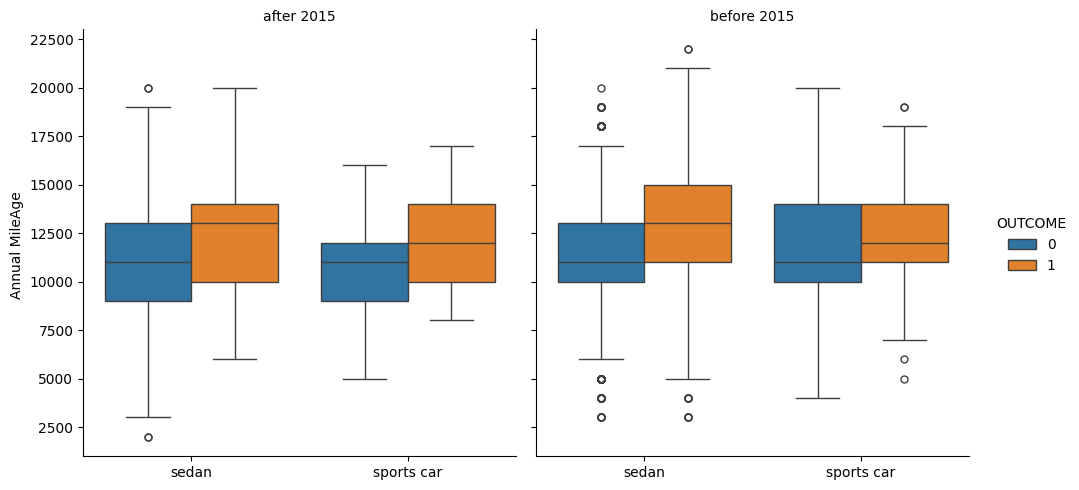

In [122]:
fig = sns.catplot(data=data, x="VEHICLE_TYPE", y="ANNUAL_MILEAGE", hue="OUTCOME", col="VEHICLE_YEAR",kind='box')
fig.set_axis_labels("", "Annual MileAge ")
fig.set_titles("{col_name}")
fig.tight_layout()

In [123]:
out = data.groupby('OUTCOME')['ANNUAL_MILEAGE'].median()
out

OUTCOME
0    11000.0
1    13000.0
Name: ANNUAL_MILEAGE, dtype: float64

Penjelasan :

- Outcome 1 (klaim asuransi) memiliki nilai median annual mileage yang lebih tinggi dibandingkan dengan Outcome 0 (tidak ada klaim asuransi). Hal ini menunjukkan bahwa pemilik kendaraan yang melakukan klaim asuransi cenderung mengendarai kendaraan mereka lebih jauh daripada pemilik yang tidak melakukan klaim.
- Outcome 1 (klaim asuransi) lebih umum terjadi pada jenis mobil sedan dan sport car, terutama pada mobil dengan tahun pembuatan sebelum 2015. Sementara itu, Outcome 0 (tidak ada klaim) cenderung terjadi pada mobil dengan tahun pembuatan setelah 2015.

Insight bisnis :
- Mereka dapat menawarkan premi yang lebih tinggi kepada pemilik kendaraan dengan jumlah mil per tahun (annual mileage) yang lebih tinggi, karena meningkatnya risiko klaim.Di sisi lain, mereka mungkin ingin menawarkan insentif atau diskon kepada pemilik kendaraan dengan jumlah mil per tahun yang lebih rendah untuk mendorong perilaku berkendara yang lebih aman.

-  Perusahaan dapat menggunakan informasi ini untuk menyesuaikan strategi risiko mereka dan menetapkan premi dengan lebih akurat. Mereka mungkin perlu mempertimbangkan untuk menetapkan premi yang lebih tinggi untuk mobil sedan dan sport car yang lebih lama dan berusia di atas 2015 karena potensi risiko klaim yang lebih tinggi. Di sisi lain, mereka dapat menawarkan premi yang lebih rendah untuk mobil dengan tahun pembuatan setelah 2015 untuk mendorong pemilik kendaraan untuk memilih kendaraan yang lebih baru dan lebih aman.

Asumsi pelanggan :
- Pelanggan yang sering mengendarai kendaraan mereka mungkin lebih rentan terhadap kecelakaan atau kerusakan, sehingga lebih cenderung untuk melakukan klaim asuransi.
- Pemilik mobil sedan dan sport car mungkin lebih berisiko terhadap kecelakaan atau pencurian, yang mengarah pada frekuensi klaim yang lebih tinggi.
- Pemilik mobil yang lebih tua mungkin lebih berhati-hati dalam mengemudi dan merawat kendaraan mereka, yang dapat mengurangi kemungkinan klaim asuransi.


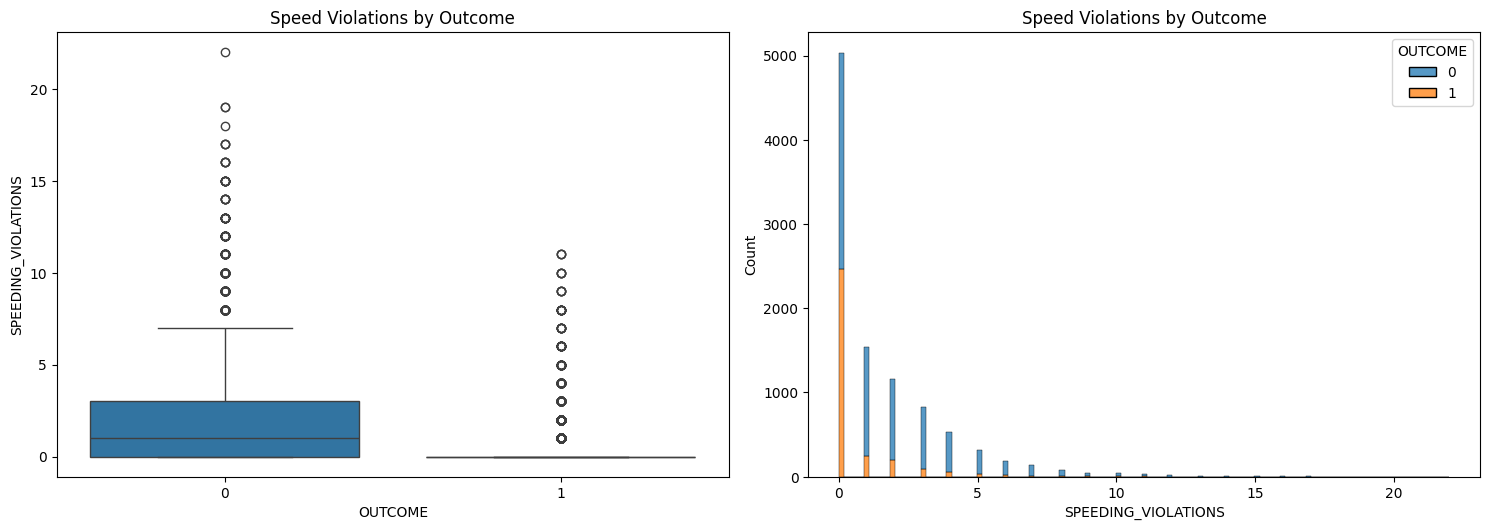

In [124]:
# Visualisasi Speed Violations

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=data, x='OUTCOME', y='SPEEDING_VIOLATIONS')
plt.title('Speed Violations by Outcome')


plt.subplot(2,2,2)
sns.histplot(data=data, x='SPEEDING_VIOLATIONS', hue='OUTCOME', multiple='stack')
plt.title('Speed Violations by Outcome')


plt.tight_layout()
plt.show()


<Axes: xlabel='AGE', ylabel='SPEEDING_VIOLATIONS'>

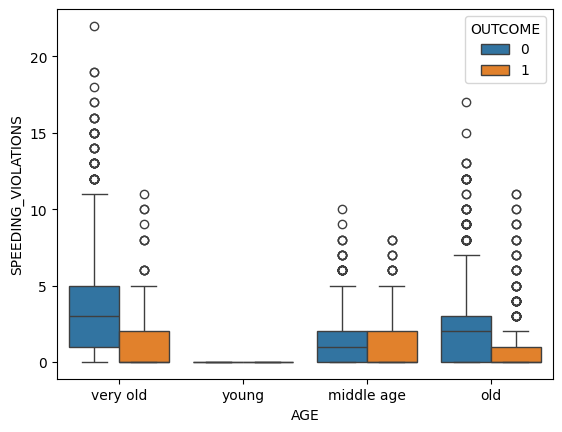

In [125]:
# speed violations grouping

sns.boxplot(data, x='AGE', y='SPEEDING_VIOLATIONS', hue='OUTCOME')



Penejelasan:

- Hasil visualisasi speeding violations by outcome, bahwa outcome 1 (claim insurance) lebih cenderung tidak melakukan pelanggaran kecepatan sedangkan outcome 0 (no claim insurance) setidaknya pernah melakukan pelanggaran 1 atau lebih
- Pola pelanggaran kecepatan berbeda-beda berdasarkan usia pengemudi dan hubungannya dengan klaim asuransi. Pengemudi muda (young) mungkin cenderung memiliki tingkat pelanggaran kecepatan yang lebih rendah, sementara pengemudi yang sangat tua (very old) cenderung memiliki tingkat pelanggaran yang lebih tinggi.

- Mereka mungkin ingin memberikan insentif atau diskon kepada pelanggan yang memiliki catatan pelanggaran kecepatan yang bersih atau rendah sebagai insentif untuk perilaku berkendara yang lebih aman. Di sisi lain, mereka dapat menetapkan premi yang lebih tinggi untuk pelanggan dengan catatan pelanggaran kecepatan yang buruk sebagai refleksi dari risiko yang lebih tinggi.
-  Perusahaan dapat mempertimbangkan profil risiko berdasarkan usia pengemudi dalam penetapan premi asuransi. Mereka mungkin ingin menawarkan premi yang lebih rendah kepada pengemudi muda yang memiliki catatan pelanggaran kecepatan yang rendah atau tidak ada, sementara mempertimbangkan untuk menetapkan premi yang lebih tinggi untuk pengemudi yang sangat tua dengan catatan pelanggaran yang tinggi. Strategi ini dapat membantu perusahaan mengurangi risiko klaim dan meningkatkan profitabilitas.

Asumsi Pelanggan:
- Pengemudi muda mungkin lebih berhati-hati dalam mengemudi untuk menghindari pelanggaran dan klaim asuransi yang mahal.
- Pengemudi yang sangat tua mungkin menghadapi tantangan fisik yang mempengaruhi kemampuan mereka dalam mengemudi dengan aman, yang dapat mengakibatkan tingkat pelanggaran yang lebih tinggi.
- Pengemudi dalam rentang usia menengah dan tua mungkin memiliki pengalaman dalam mengemudi namun masih rentan terhadap pelanggaran, meskipun dalam tingkat yang berbeda.

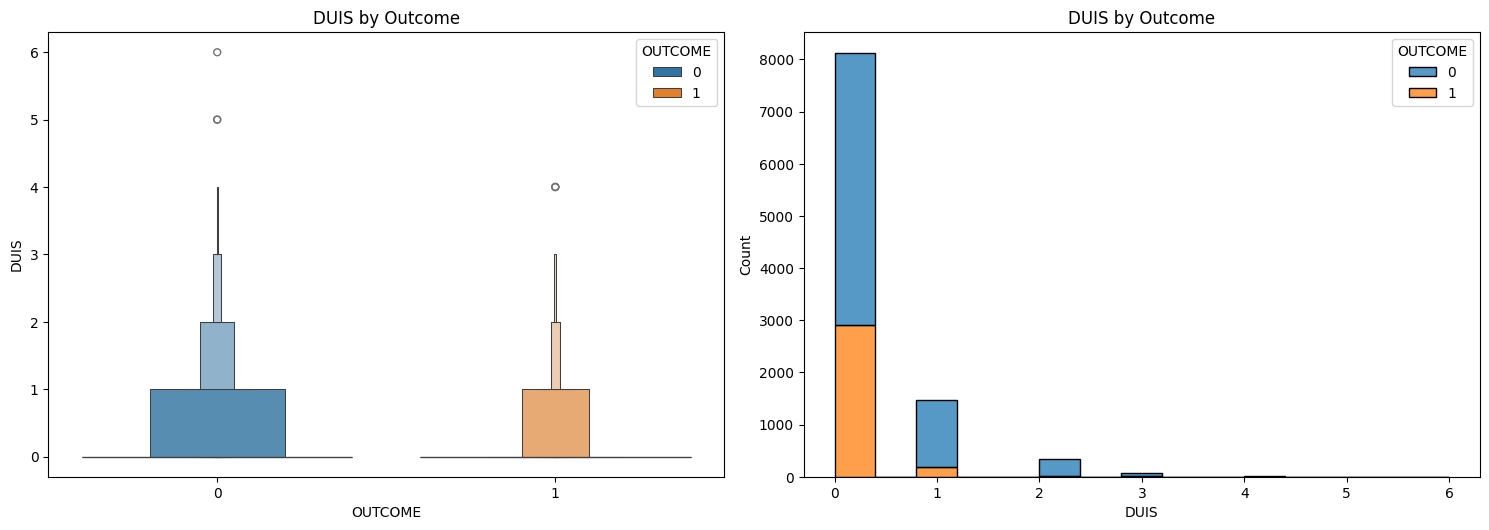

In [126]:
# Visualisasi DUIS

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxenplot(data=data, y="DUIS",x='OUTCOME',  hue='OUTCOME')
plt.title('DUIS by Outcome')


plt.subplot(2,2,2)
sns.histplot(data=data, x='DUIS', hue='OUTCOME', multiple='stack')
plt.title('DUIS by Outcome')


plt.tight_layout()
plt.show()

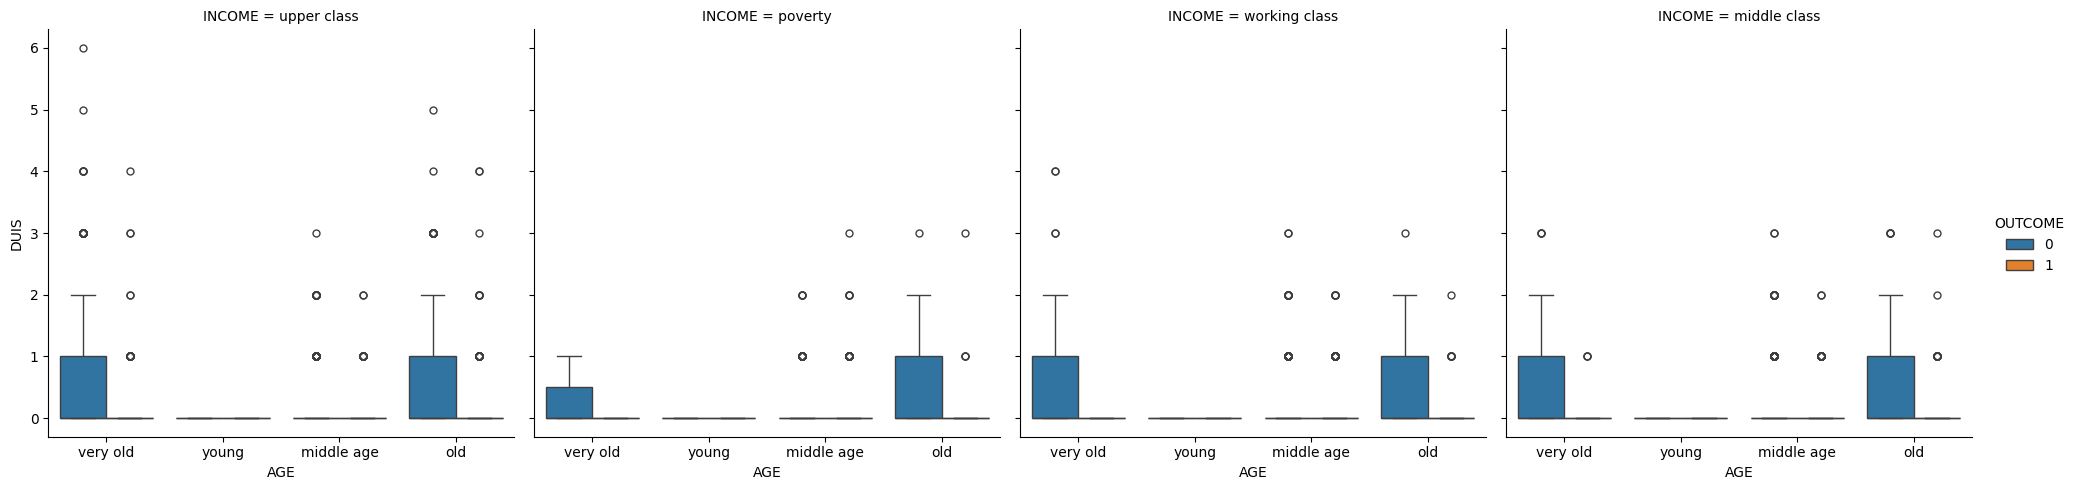

In [127]:
# DUIS grouping
g = sns.catplot(data=data, x="AGE", y="DUIS", hue="OUTCOME", col="INCOME",kind='box')
# g.set_axis_labels("", "DUIS")
# g.set_xticklabels(['poverty', 'working class', 'middle class', 'upper class'], )
# g.set_titles("{col_name}")

Penjelasan:
- Hasil visualisasi bahwa DUIS ("Driving Under the Influence Surcharge") by outcome, bahwa outcome 0(no claim) lebih cenderung melakukan pelanggaran tersebut di bandingkan dengan  Outcome 1(claim insurance).
- dan hasil DUIS by income and age, bahwa usia very old dan old lebih sering melakukan pelanggaran tersebut

insight bisnis:
- Perusahaan dapat menggunakan informasi ini untuk menilai risiko dan penetapan premi. Meskipun pelanggan Outcome 0 mungkin tidak sering melakukan klaim, mereka mungkin memiliki risiko yang lebih tinggi untuk terlibat dalam kecelakaan atau insiden serius karena perilaku mengemudi yang berisiko. Oleh karena itu, perusahaan mungkin ingin menyesuaikan premi mereka untuk mencerminkan risiko ini secara lebih akurat.

-  Mereka mungkin ingin menawarkan program pendidikan atau insentif kepada kelompok usia ini untuk meningkatkan kesadaran tentang bahaya DUIS dan mendorong perilaku mengemudi yang lebih aman. Di samping itu, perusahaan juga dapat mempertimbangkan untuk menyesuaikan premi atau menawarkan layanan tambahan kepada pelanggan dalam kelompok usia ini untuk meminimalkan risiko klaim dan kecelakaan.

Asumsi Pelanggan:
- Pengemudi yang tidak pernah melakukan klaim asuransi mungkin merasa lebih percaya diri dalam perilaku mengemudi mereka, yang mungkin menyebabkan kecenderungan untuk melakukan pelanggaran DUIS.
- Pengemudi dalam kelompok usia very old dan old mungkin mengalami penurunan refleks dan kognitif yang dapat mempengaruhi kemampuan mereka untuk mengemudi dengan aman, termasuk keputusan untuk mengemudi di bawah pengaruh alkohol.

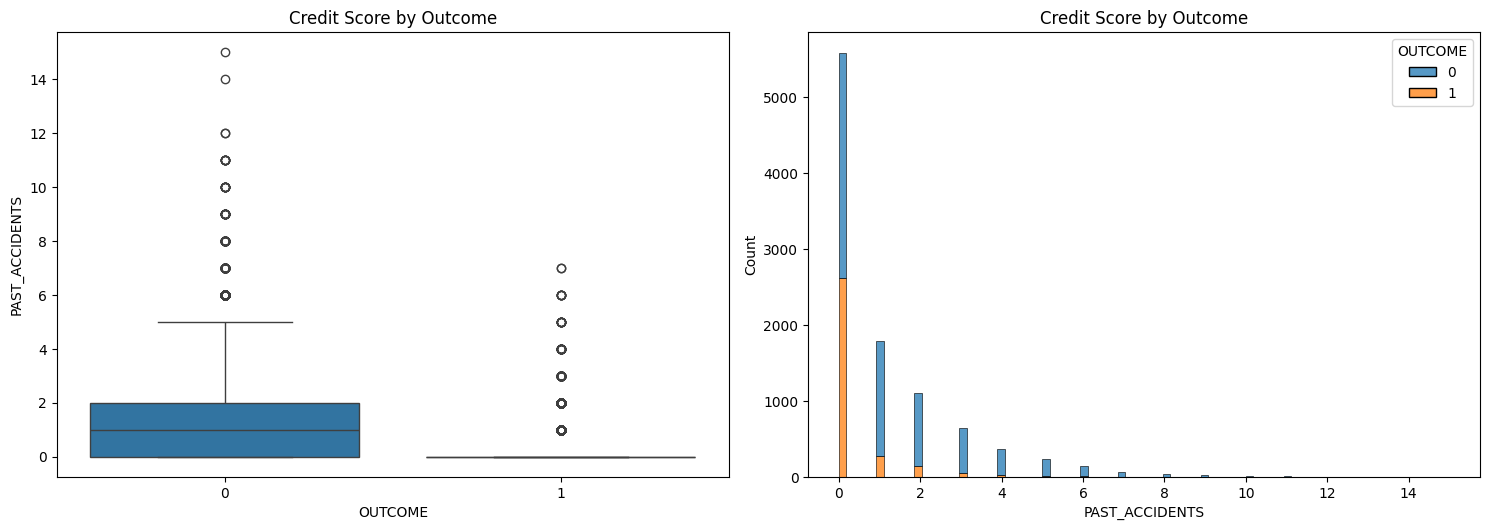

In [128]:
# Visualisasi Past Accidents

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=data, x='OUTCOME', y='PAST_ACCIDENTS')
plt.title('Credit Score by Outcome')


plt.subplot(2,2,2)
sns.histplot(data=data, x='PAST_ACCIDENTS', hue='OUTCOME', multiple='stack')
plt.title('Credit Score by Outcome')


plt.tight_layout()
plt.show()

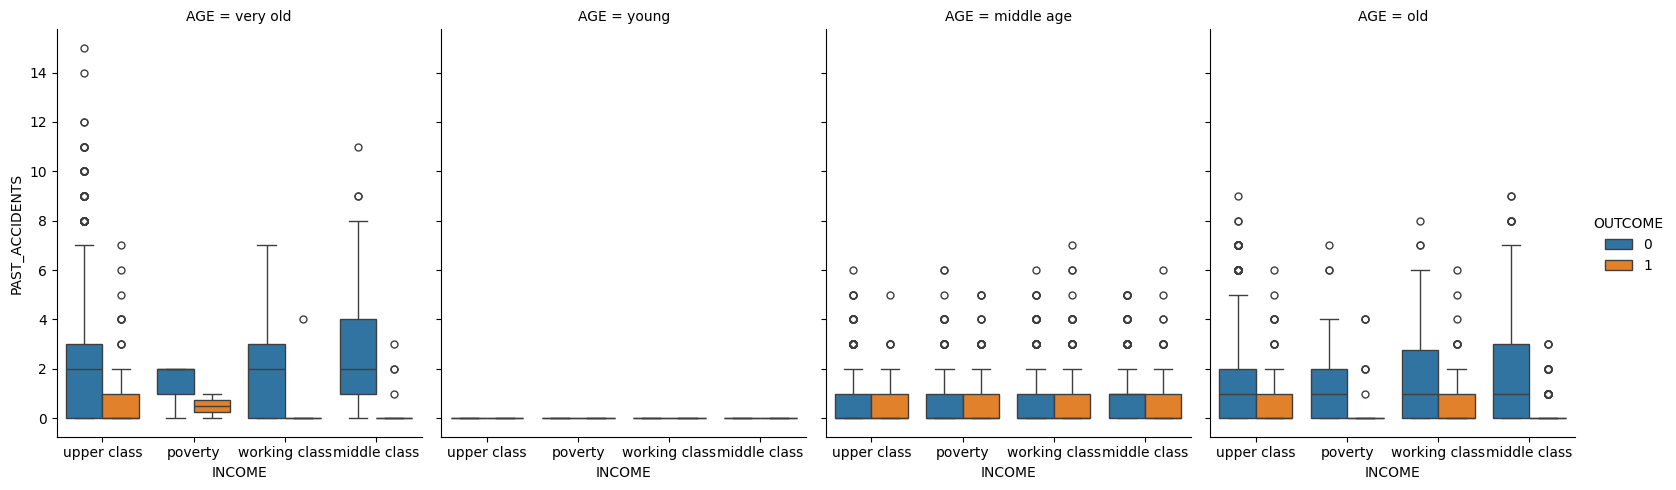

In [129]:
# Past Accidents grouping
g = sns.catplot(data=data, x="INCOME", y="PAST_ACCIDENTS", hue="OUTCOME", col="AGE",kind='box', aspect=.8)
# g.set_axis_labels("", "Past Accidents")
# g.set_xticklabels(['poverty', 'working class', 'middle class', 'upper class'])
# g.set_titles("{col_name}")
g

Penjelasan:

- Outcome 1 (klaim asuransi) cenderung memiliki riwayat kecelakaan masa lalu yang lebih sedikit, sementara Outcome 0 (tidak ada klaim asuransi) cenderung memiliki lebih banyak pelanggaran di masa lalu.
- Usia old dan very old cenderung memiliki riwayat kecelakaan masa lalu yang lebih banyak.

Insight Bisnis: 
- Perusahaan dapat menggunakan informasi ini untuk menyusun strategi manajemen risiko dan pendekatan pemasaran yang lebih spesifik. Mereka mungkin ingin menargetkan kampanye keselamatan jalan raya dan program pendidikan kepada kelompok usia ini untuk mengurangi risiko kecelakaan di masa depan. Di samping itu, mereka juga dapat mempertimbangkan untuk menawarkan layanan tambahan, seperti program pelatihan mengemudi yang disesuaikan, kepada pelanggan dalam kelompok usia ini untuk membantu mereka meningkatkan kesadaran dan keterampilan mengemudi mereka.

Asumsi Pelanggan:
Pelanggan yang tidak memiliki riwayat kecelakaan masa lalu mungkin merasa lebih percaya diri dalam mengemudi mereka, yang dapat mengurangi kemungkinan mereka untuk melakukan klaim asuransi di masa depan.
Pengemudi dalam kelompok usia old dan very old mungkin mengalami penurunan kemampuan fisik atau kognitif yang dapat memengaruhi kualitas mengemudi mereka, yang dapat meningkatkan risiko kecelakaan.

### **Conclusion**

**Balancing Data**: Ditemukan ketidakseimbangan data dalam kolom Outcome, yang memerlukan tindakan balancing untuk meningkatkan keakuratan model prediksi.



**Analisis Personalty**

Berdasarkan hasil yang saya analisis terdapat pola perbedaan klaim asusransi antara pelanggan dari jenis kelamin, status pernikahan, memiliki anak dsb. saya mengkategorikan berdasarkan outcome sebagai berikut:

*Dalam kasus outcome 1 (Claim insurance)*
- Cenderung laki-laki
- Di rentang usia 16-25 tahun (young)
- Single
- Tidak ada perbedaan signifikan "memiliki anak atau tidak"
- Berdasarkan City New york lebih tinggi, di susul Orlando, San diego, dan terakhir baltimore
- Berdasarkan Education, high school lebih tinggi untuk mengajukan klaim asuransi.
- Income cenderung Poverty(tidak stabil)
- Driving experience semakin kurang berpengalaman mengemudi semakin tinggi mengajukan klaim


*Dalam kasus outcome 0 (No claim insurance)*
- Cenderung wanita
- Di rentang usia 40-64 (old)
- Menikah
- Memiliki anak
- Berdasarkan City New york tinggi, Orlando, dan San diego
- Berdasarkan Education, University cenderung tingg, dan high school
- Income lebih cenderung upper class dan middle class
- Drive experience semakin berpengalaman mengemudi maka lebih tinggi tidak mengajukkan klaim asusransi
- Credit score tinggi 
- Ras walaupun tidak ada korelasi namun outcome tinggi di majority

Berdasarkan analisis pola klaim asuransi, faktor-faktor personal seperti usia, pendidikan, dan status perkawinan mempengaruhi frekuensi klaim. Pengemudi muda (16-25 tahun) dan dengan pendidikan rendah (high school) cenderung memiliki frekuensi klaim yang lebih tinggi. Sebaliknya, pengemudi yang lebih tua (40-64 tahun), berpendidikan tinggi (university), menikah, dan memiliki anak cenderung lebih jarang mengajukan klaim.

**Analisis Vehicle (kendaraan)**

sebagai berikut hasil temuan dari vehicle:

*Dalam kasus outcome 1 (Claim Insurance)*
- Cenderung Mobil sebelum tahun 2015
- Jenis mobil sedan cenderung tinggi di bandingkan sport car
- Pengajuan bukan milik mobil sendiri
- Dari Annual mileage cenderung tinggi

*Dalam kasus outcome 0 (No claim insurance)*
- Jenis mobil cenderung sedan
- Cenderung mobil setelah tahun 2015
- Milik pribadi
- Dan Annual mileage cendrung rendah

Jenis dan usia kendaraan memiliki pengaruh besar terhadap pola klaim asuransi. Mobil yang lebih tua atau jenis mobil tertentu, seperti sedan, cenderung memiliki frekuensi klaim yang lebih tinggi.

**Analisis Accidents**

Dari hasil temuan bahwa ada pengaruh dalam klaim asuransi berdasarkan pelanggaran atau kerusakan yang di terima sebagai berikut:

*Dalam kasus outcome 1 (Claim Insurance)*
- Jarang melakukan pelanggaran kecapatan
- DUIS ("Driving Under the Influence Surcharge") jarang melakukan pelanggaran tersebut
- Past accident cenderung memiliki riwayat kecelakaan masa lalu yang lebih sedikit
- Dalam hal usia 16-25 (young) jarang melakukan pelanggaran 

Dalam kasus outcome 0 (No Claim Insurance)
- Setidaknya pernah 1 kali melakukan pelanggaran kecepatan dan lebih
- DUIS ("Driving Under the Influence Surcharge") sering melakukan pelanggaran tersbut
- Past accidents kebanyakan memiliki riwayat dalam accident tertentu
- Di Usia rentang 40+ tahun lebih tinggi dalam melakukan pelanggaran

Pelanggaran lalu lintas dan riwayat kecelakaan masa lalu berpengaruh besar terhadap klaim asuransi. Pelanggan dengan riwayat pelanggaran dan kecelakaan lebih rendah cenderung lebih jarang mengajukan klaim.


**Bisnis Insight :**

- Penetapan Premi:
    - Tingkatkan Premi: Untuk pelanggan dengan riwayat pelanggaran, DUIS, dan kecelakaan, serta yang mengemudi mobil tua atau mengemudi jarak jauh.
    - Diskon Premi: Untuk pelanggan dengan catatan bersih, mobil baru, dan mengemudi jarak pendek.

- Strategi Pemasaran:

    - Kampanye Edukasi Keselamatan: Targetkan pelanggan usia 40+ dengan program keselamatan untuk mengurangi pelanggaran.
    - Insentif untuk Pengemudi Muda: Tawarkan program insentif untuk mendorong perilaku berkendara aman di kalangan pengemudi muda (usia 16-25).

- Segmentasi Pelanggan:

    - Segmentasi Berdasarkan Usia dan Pengalaman Mengemudi: Targetkan pelanggan lebih berpengalaman (usia 40-64) dengan premi lebih rendah.
    - Targetkan Penghasilan dan Pendidikan: Fokus pada pelanggan dengan pendidikan university dan penghasilan menengah ke atas untuk premi yang lebih stabil.

- Layanan Tambahan:

    - Program Pelatihan Mengemudi: Untuk pelanggan dengan riwayat pelanggaran dan kecelakaan, untuk meningkatkan keterampilan berkendara.
    - Insentif Pemeliharaan Kendaraan: Berikan diskon atau insentif untuk pemeliharaan mobil baru (setelah tahun 2015).

- Kampanye Regional:

    - Fokus pada Kota dengan Klaim Tinggi: Tingkatkan layanan di New York, Orlando, San Diego, dan Baltimore dengan kampanye promosi khusus.
    - Promosi di Wilayah Risiko Tinggi: Sesuaikan strategi pemasaran di wilayah dengan risiko klaim tinggi berdasarkan data demografis dan geografi.
Dengan strategi-strategi ini, perusahaan asuransi dapat mengelola risiko lebih efektif, menetapkan premi dengan lebih akurat, dan meningkatkan keuntungan serta kepuasan pelanggan.

---

# v. Faeture Engineering

In [130]:
# cek duplicated data
data.duplicated().sum()

12

Terlihat 12 data terduplikat, jadi harus hapus agar tidak memengaruhi model

In [131]:
# drop duplicates data
data.drop_duplicates(inplace=True)

In [132]:
data.duplicated().sum()

0

Oke duplikat sudah hilang selanjutnya melakukan spliting

### Split Data

In [133]:
# split data feature dan target
X = data.drop('OUTCOME', axis=1)
y = data['OUTCOME']


In [134]:
# Split data Train dan Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=22)

In [135]:
# Create function sizes chek
def print_data_sizes(X_train, y_train, X_test, y_test):
    print('Train Data')
    print('Ukuran X_train : ', X_train.shape)
    print('Ukuran y_train : ', y_train.shape)
    print('\n')
    print('Test Data')
    print('Ukuran X_test : ', X_test.shape)
    print('Ukuran y_test : ', y_test.shape)


print_data_sizes(X_train, y_train, X_test, y_test)

Train Data
Ukuran X_train :  (7990, 17)
Ukuran y_train :  (7990,)


Test Data
Ukuran X_test :  (1998, 17)
Ukuran y_test :  (1998,)


## Checking Cardinality

In [136]:
def tampilkan_nilai_unik(df):
    cols_cat = df.select_dtypes(include=['object']).columns.to_list() # pilih kolom kategorikal
    data_list = []
    for column in df[cols_cat]:
      unique_values = df[column].unique()
      data_dict = {
          'nama_kolom':column,
          'nilai_unik':df[column].unique(),
          'count_unik':len(unique_values),
          'cardinality': 'high' if len(unique_values) > 10 else 'low '
      }
      data_list.append(data_dict)
    
    data = pd.DataFrame(data_list)

    return data

In [137]:
tampilkan_nilai_unik(X_train)

,nama_kolom,nilai_unik,count_unik,cardinality
0,AGE,"[very old, young, old, middle age]",4,low
1,GENDER,"[female, male]",2,low
2,RACE,"[majority, minority]",2,low
3,DRIVING_EXPERIENCE,"[expert, newbie, amateure, advanced]",4,low
4,EDUCATION,"[university, none, high school]",3,low
5,INCOME,"[upper class, poverty, working class, middle c...",4,low
6,VEHICLE_YEAR,"[before 2015, after 2015]",2,low
7,VEHICLE_TYPE,"[sedan, sports car]",2,low
8,CITY,"[baltimore, new york, orlando, san diego]",4,low


In [138]:
X_train.nunique().to_frame().reset_index().rename(columns={'index':'Column',0:'Unique_values'})

,Column,Unique_values
0,AGE,4
1,GENDER,2
2,RACE,2
3,DRIVING_EXPERIENCE,4
4,EDUCATION,3
5,INCOME,4
6,CREDIT_SCORE,7192
7,VEHICLE_OWNERSHIP,2
8,VEHICLE_YEAR,2
9,MARRIED,2


Dari check data Cardinality tidak ada pola atau tidak ada yang harus di decrease cardinality karena sudah mewakili semua informasi. Dari Dataframe yang memiliki high cardinality CREDIT_SCORE tentu saja karena numerik.

## Handling Missing Value

<Axes: >

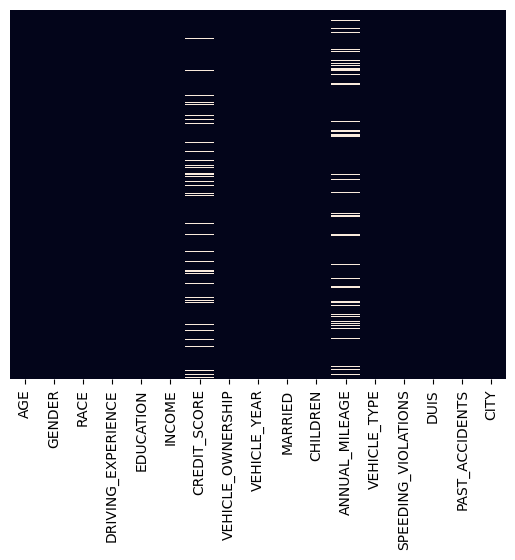

In [139]:
# plot missing value
sns.heatmap(X_train.isna(),yticklabels=False ,cbar=False)

Dari visualisasi terlihat bahwa kolom "credit score" dan "Annual millage" memiliki missing value. selanjutnya kita coba cek apakah ada pola tertentu dan tipe missing value apa?.

In [140]:
# Menggunakan df mempermudah analisis
df[df['CREDIT_SCORE'].isnull()].head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CITY
17,young,male,majority,newbie,none,poverty,NaN,0,before 2015,1,0,12000.0,sedan,0,0,0,1,orlando
23,young,male,majority,newbie,none,poverty,NaN,0,before 2015,0,0,17000.0,sedan,0,0,0,0,new york
37,old,female,majority,amateure,none,middle class,NaN,1,before 2015,1,1,11000.0,sedan,2,0,1,0,new york
38,very old,male,majority,expert,university,upper class,NaN,0,after 2015,0,1,12000.0,sports car,6,0,5,0,new york
47,old,female,majority,advanced,university,upper class,NaN,1,after 2015,1,1,11000.0,sedan,3,0,2,0,san diego


In [141]:
df[df['ANNUAL_MILEAGE'].isnull()].head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CITY
13,young,female,majority,newbie,university,upper class,0.591260,1,before 2015,0,1,NaN,sedan,0,0,0,0,new york
15,middle age,female,majority,newbie,high school,upper class,0.762798,0,after 2015,1,0,NaN,sedan,0,0,0,0,new york
16,very old,male,majority,expert,university,upper class,0.796175,1,before 2015,1,1,NaN,sedan,10,2,1,0,orlando
18,middle age,female,majority,newbie,university,upper class,0.680594,1,before 2015,0,1,NaN,sedan,0,0,0,1,orlando
58,old,female,majority,advanced,university,middle class,0.570157,1,after 2015,1,1,NaN,sedan,0,0,0,0,new york


In [142]:
df[['CREDIT_SCORE', 'ANNUAL_MILEAGE']].isnull().sum()

CREDIT_SCORE      982
ANNUAL_MILEAGE    957
dtype: int64

Berdasarkan observasi dari missing value adalah tipe MCAR (Missing Completely At Random) karena tidak ada hubungannya dengan variable lain. karena data 10% missing value jadi saya melakukan Imputation dengan mean (kerena gaussian/normal) dan menggunakan libraries SimpleImputer

In [143]:
# # Function to Filling Missing Values with Mean and 0/1

# def impute_na(df, variable, mean):
#   df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
#   df[variable].fillna(mean, inplace=True)

#   return df

In [144]:
# # Impute Missing Values
# X_train = impute_na(X_train, 'CREDIT_SCORE', X_train['CREDIT_SCORE'].mean())
# X_train = impute_na(X_train, 'ANNUAL_MILEAGE', X_train['ANNUAL_MILEAGE'].mean())


# X_test = impute_na(X_test, 'CREDIT_SCORE', X_test['CREDIT_SCORE'].mean())
# X_test = impute_na(X_test, 'ANNUAL_MILEAGE', X_test['ANNUAL_MILEAGE'].mean())


# X_train.head(5)

In [145]:
# Function to Filling Missing Values with Mean
def fillna(dataframe,feature_cols):
    
    total_cols=0
    for y in feature_cols:
        total_cols+=1
        if dataframe[y].isna().sum()>1:
            try:
                dataframe[y]=dataframe[y].fillna(int(np.mean(dataframe[y])))
            except ValueError:
                pass
        else:
            continue
    print(f"There are {total_cols} columns")

feature_cols=["CREDIT_SCORE","ANNUAL_MILEAGE"]
fillna(X_train,feature_cols)
fillna(X_test,feature_cols)

There are 2 columns
There are 2 columns


In [146]:
# Checking lagi
X_train.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
CITY                   0
dtype: int64

In [147]:
X_test.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
CITY                   0
dtype: int64

Hasil terlihat tidak ada missing value

In [148]:
# checking size
print_data_sizes(X_train, y_train, X_test, y_test)

Train Data
Ukuran X_train :  (7990, 17)
Ukuran y_train :  (7990,)


Test Data
Ukuran X_test :  (1998, 17)
Ukuran y_test :  (1998,)


## Handling Outlier

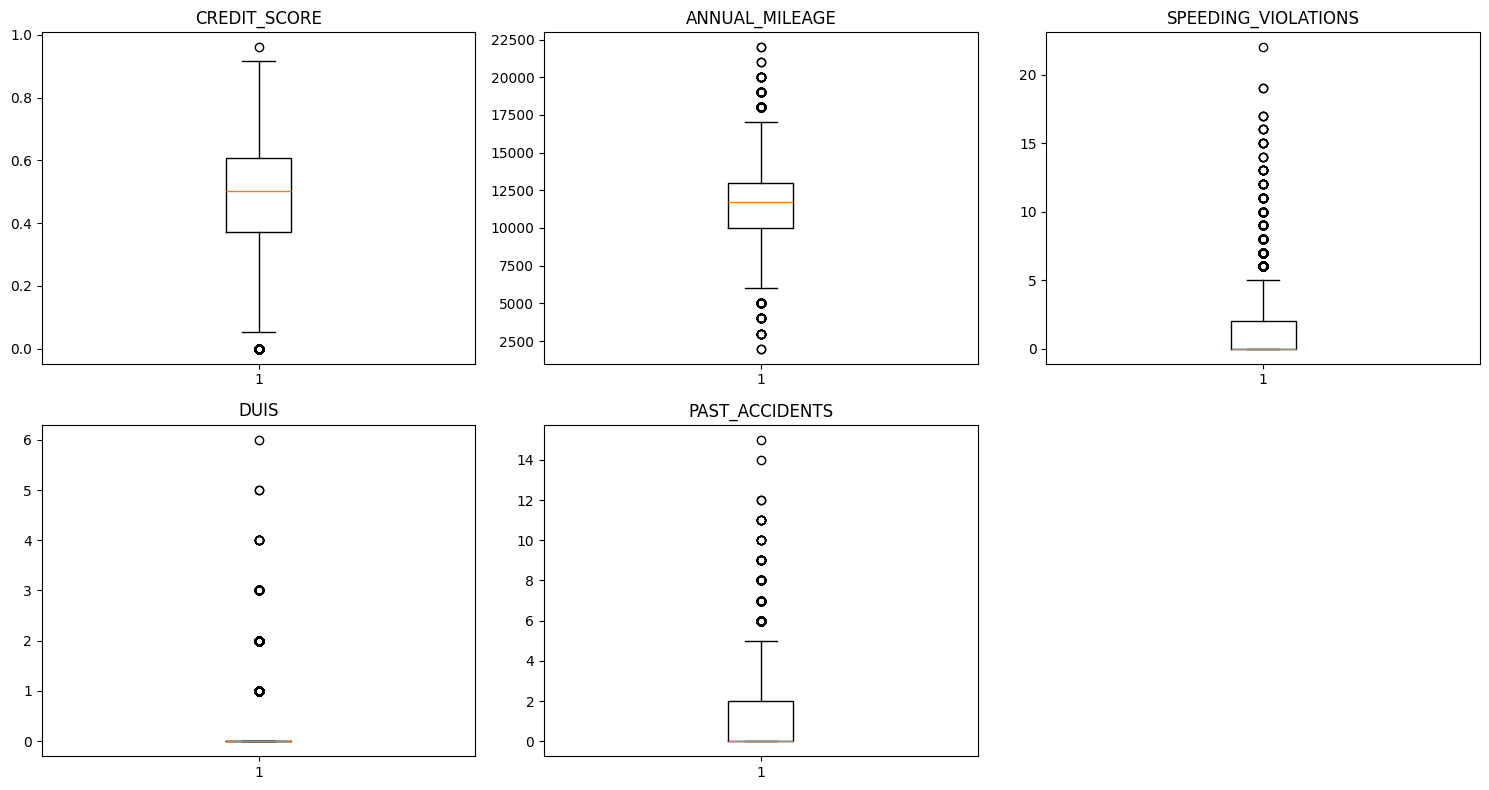

In [149]:
# Cek Outlier
to_plot = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS']

# plot figure
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(to_plot):
    axes[i].boxplot(X_train[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# show plot
plt.show()

Dari hasil boxplot semua kolom yang numerik memiliki Outlier. Namun sepertinya adalah fakta nyata jadi saya pikir di deacrease lebih baik

Seperti penjelasan di atas adanya outlier sehingga harus di atasi, dalam hal ini saya menggunakan metode Winsorization.

Cara melakukannya adalah memfilter ditribusi normal dan tidak dengan menggunakan motode statistika skewnes dan menset threshold.
- Threshold untuk Distribusi Normal: 
Biasanya, nilai skewness yang mendekati nol (`misalnya, antara -0.5 hingga 0.5`) menunjukkan bahwa distribusi data cenderung normal. 
- Threshold untuk Distribusi Skewed:
Distribusi data dikatakan skewed jika nilai skewnessnya melebihi nilai ambang tertentu. Secara umum, `nilai skewness di atas 0.5 atau di bawah -0.5` sering digunakan sebagai indikator bahwa distribusi data tidak simetris dan cenderung skewed. 


In [150]:
# Filter Numerical Columns into Variable
# num_cols = X_train.select_dtypes(include=np.number).columns.to_list()
num_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS']

# Making data and columns for normal distribution
dataNum_normal = []
listCols_normal = []

# Making data and columns for skewed distribution
dataNum_skewed = []
listCols_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for cols in num_cols:
    skewness = X_train[cols].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        listCols_normal.append(cols)
        dataNum_normal.append([cols, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        listCols_skewed.append(cols)
        dataNum_skewed.append([cols, skewness])

In [151]:
# Showing skewed columns
data_normal = pd.DataFrame(data=dataNum_normal, columns=['kolom_normal', 'skewness'])
data_normal

,kolom_normal,skewness
0,ANNUAL_MILEAGE,0.044191


In [152]:
# Showing skewed columns
data_skew = pd.DataFrame(data=dataNum_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

,kolom_skewed,skewness
0,CREDIT_SCORE,-0.923839
1,SPEEDING_VIOLATIONS,2.374421
2,DUIS,2.791864
3,PAST_ACCIDENTS,2.176000


In [153]:
# Input low variation columns into variable
col_lowVarition = ['DUIS']

# Drop the low variation columns in skewed columns, and add it into normal distribution columns
for kolom in col_lowVarition:
    listCols_skewed.remove(kolom) #-> removing low variation columns in skewed columns
    listCols_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [154]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=listCols_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

In [155]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [156]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

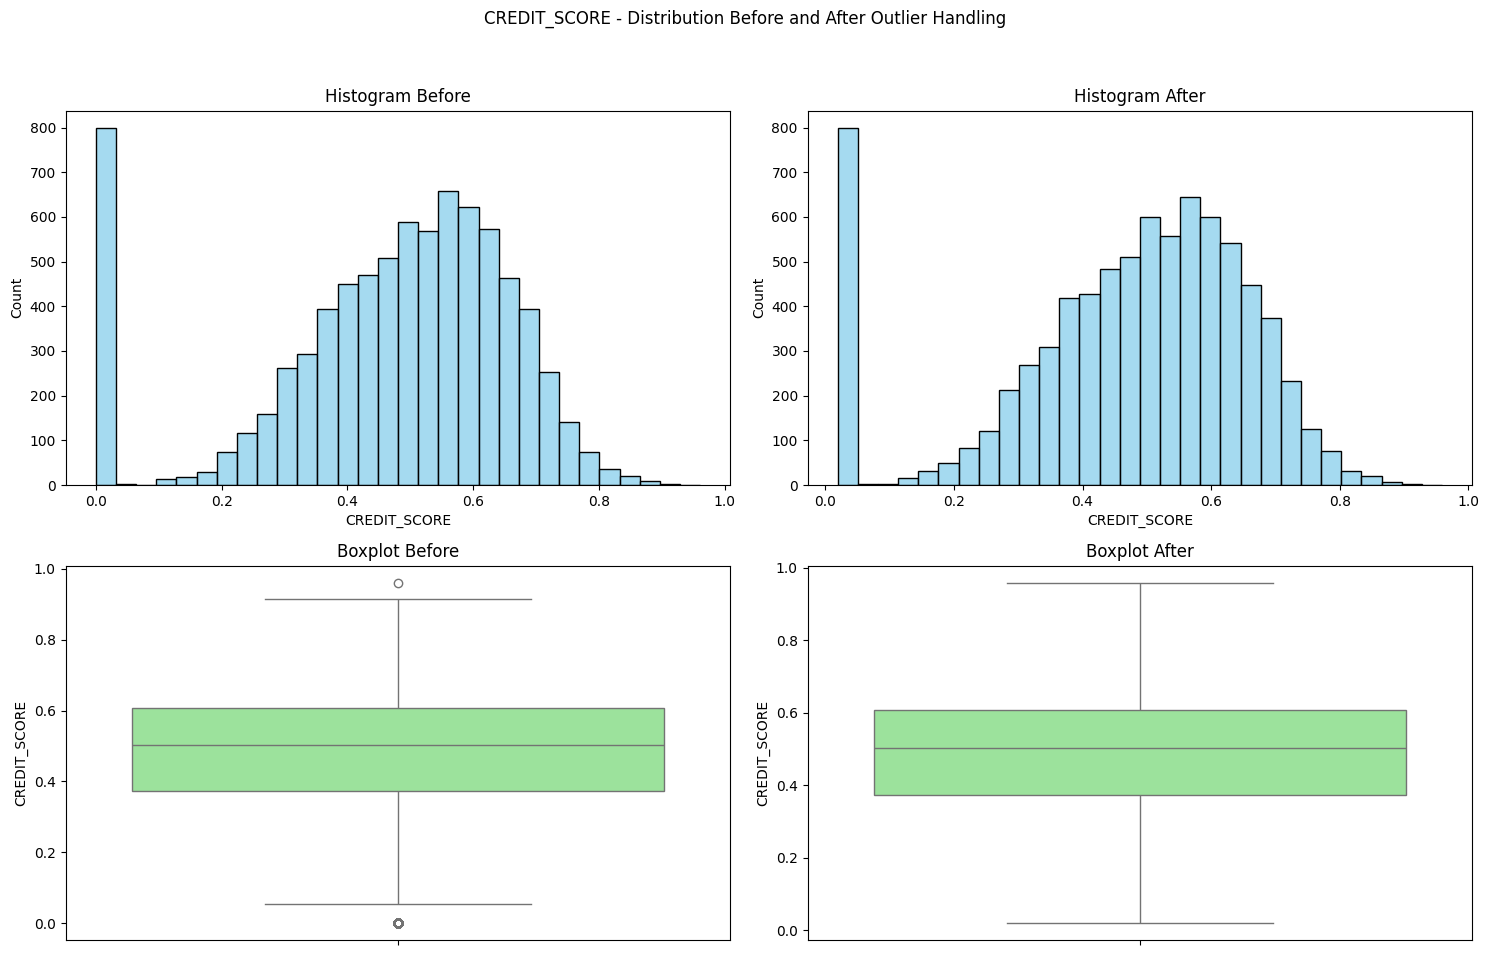

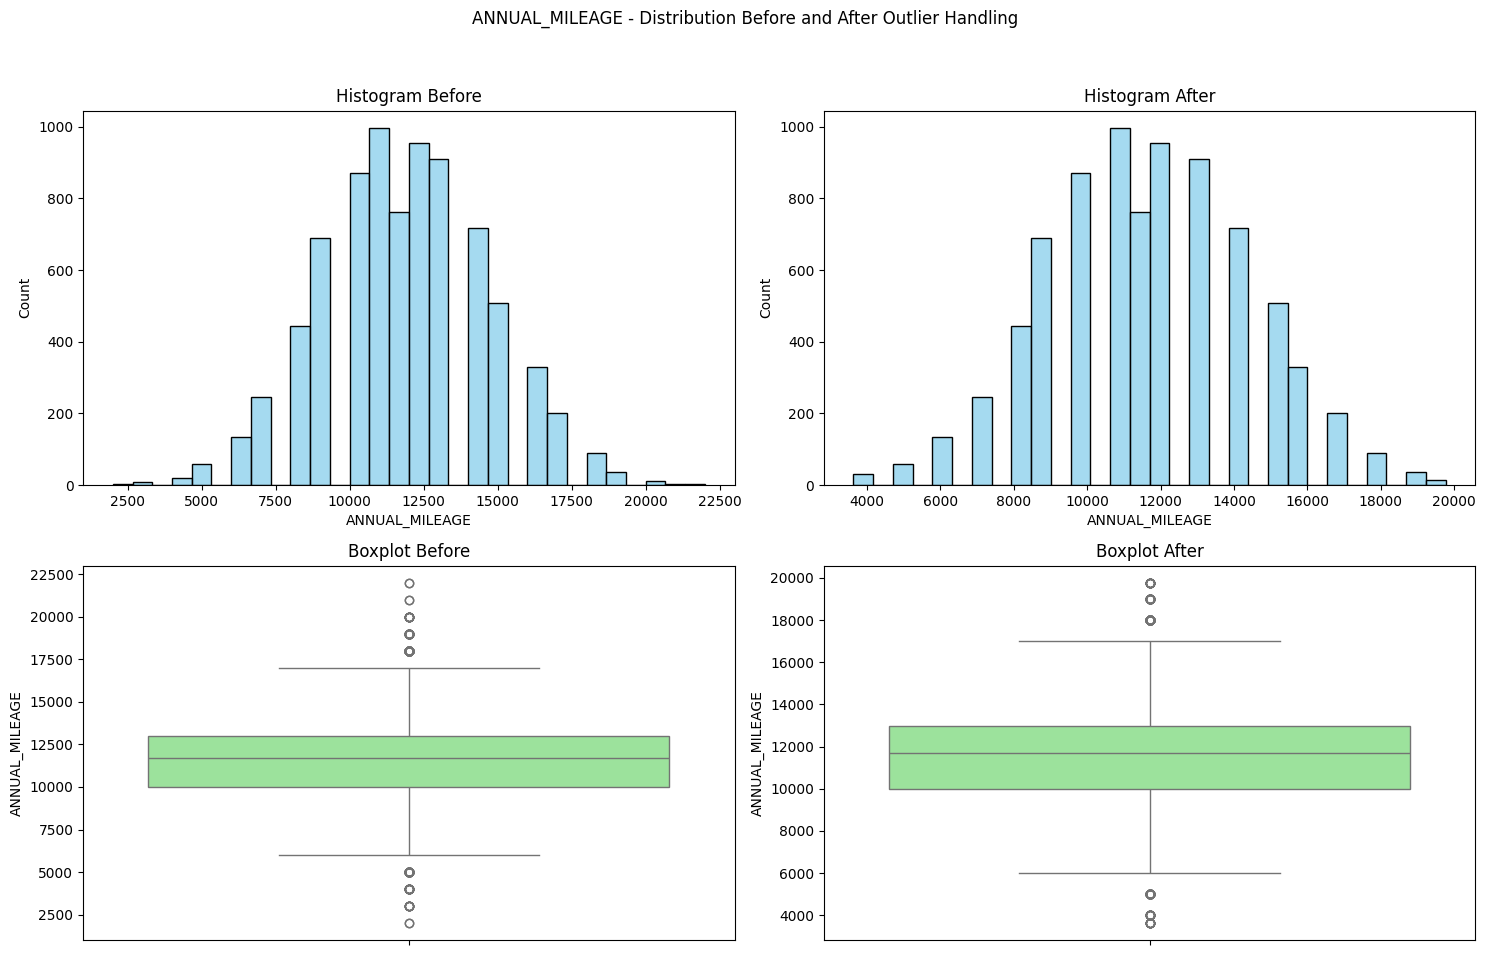

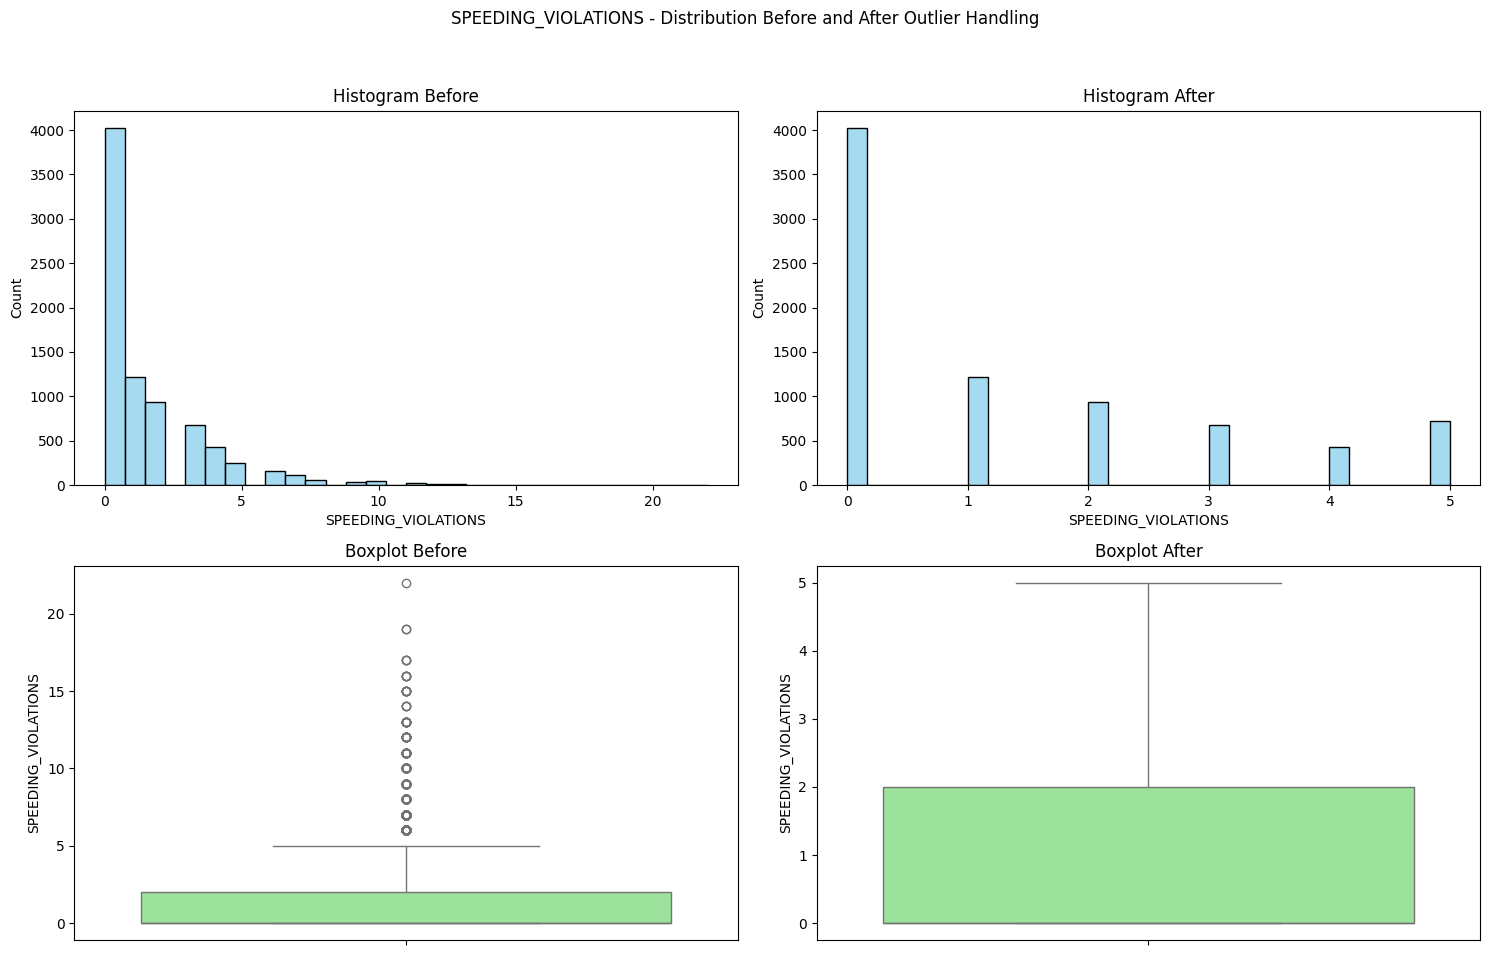

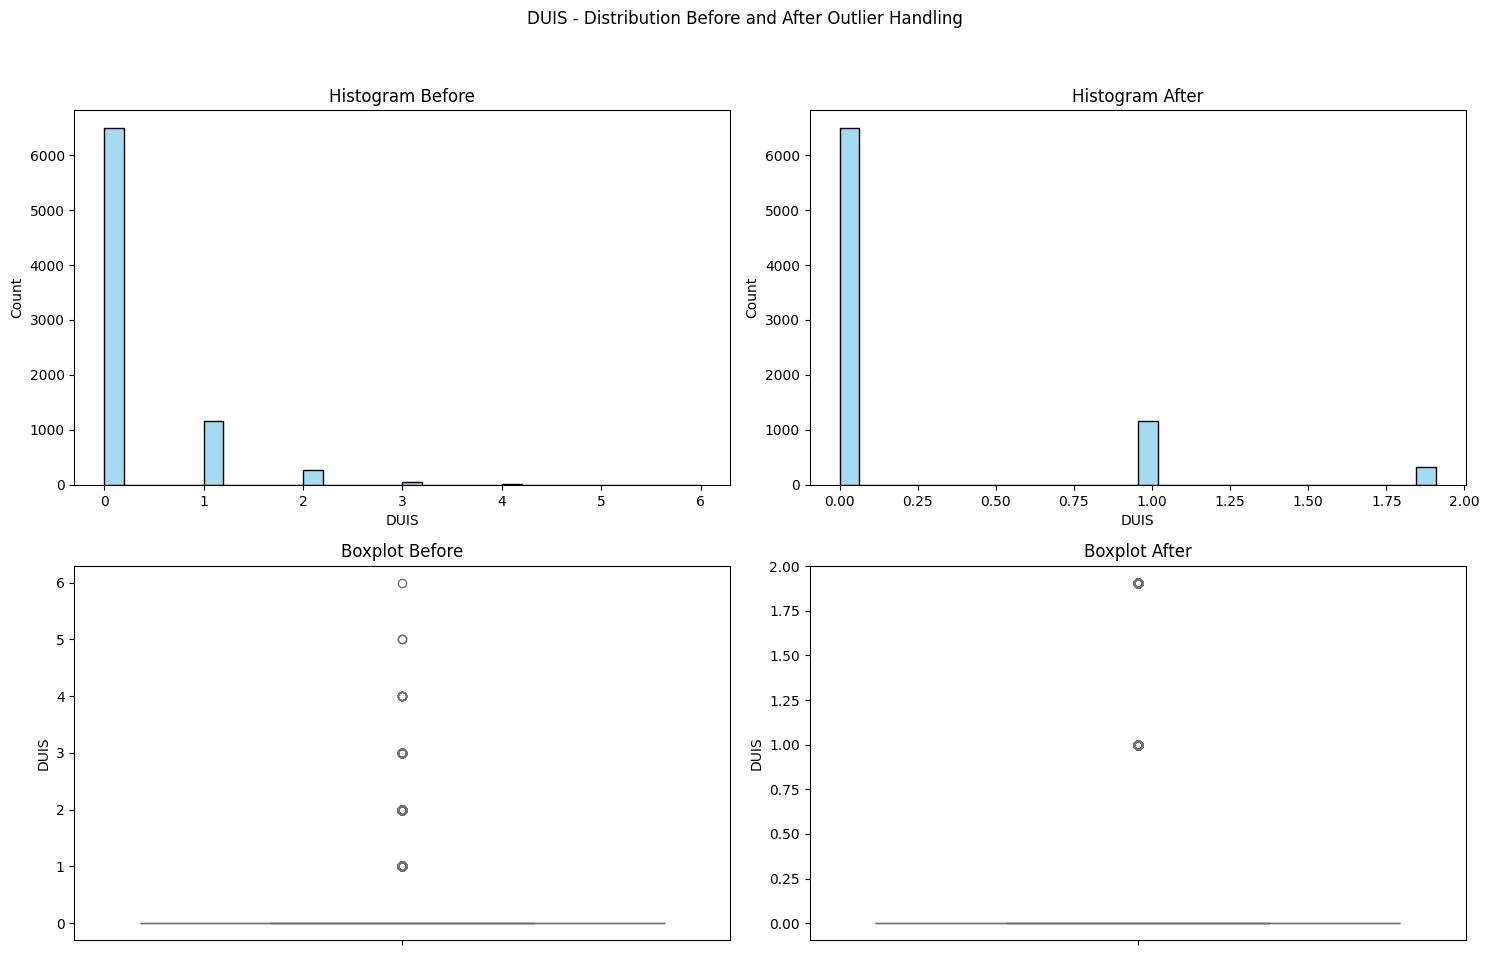

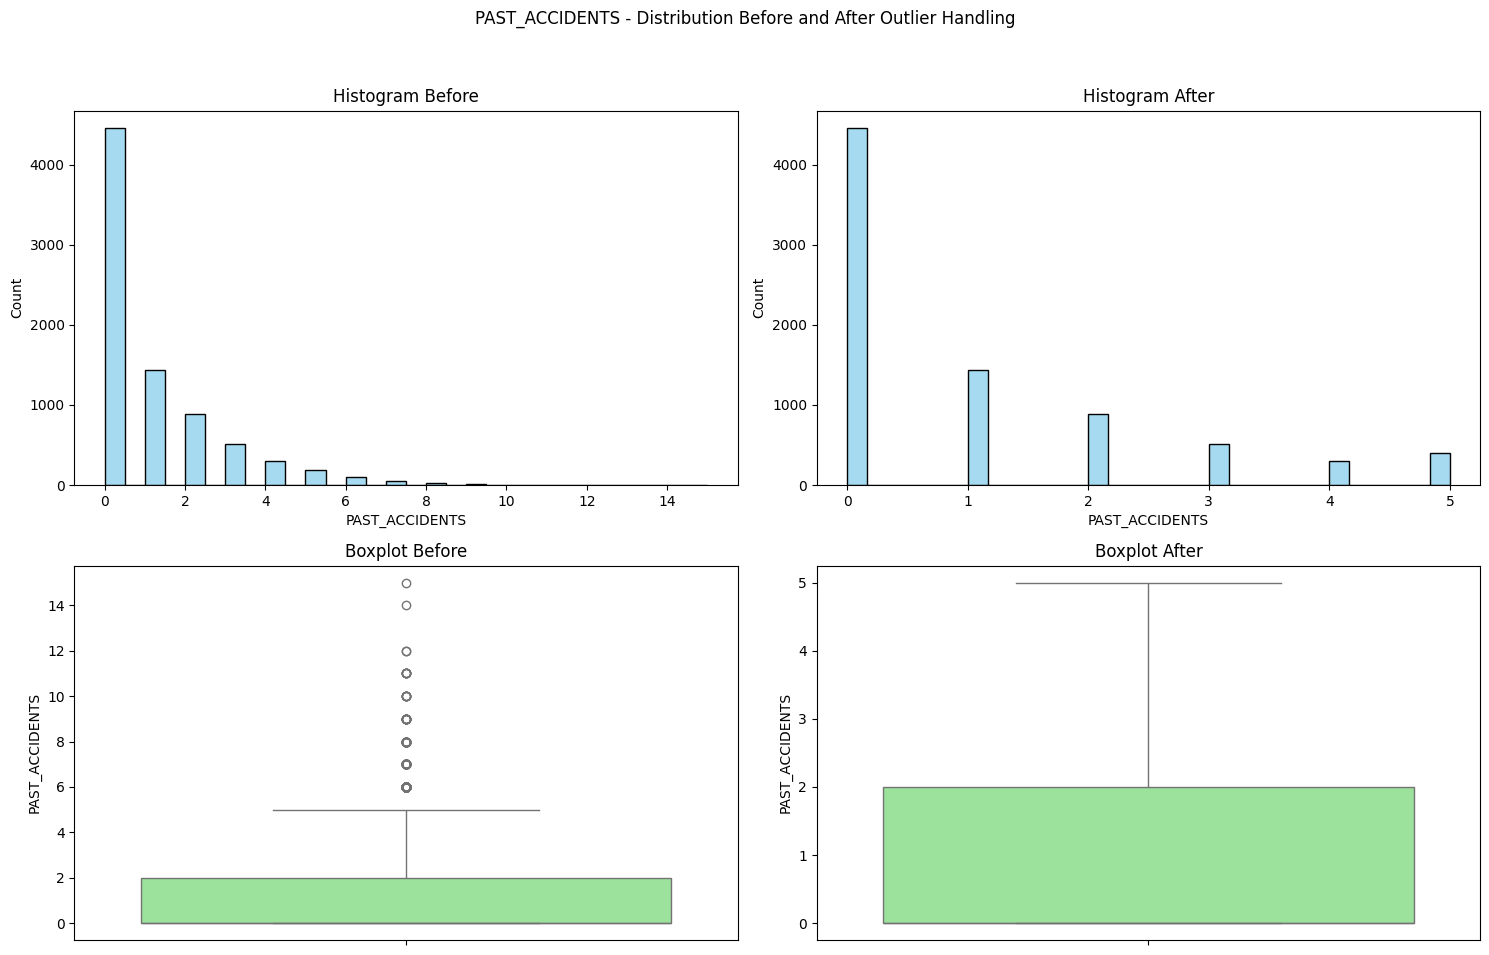

In [157]:
# Using the Function
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

Terlihat bahwa data outlier sudah di kurangi. selanjut melakukan splitting data

## Spliting Data Numerik dan Kategorik

In [158]:
# List Column Numeric
num_columns = ['CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']
# List Column Categorical
cat_columns = [
    'AGE',
    'GENDER',
    'RACE',
    'DRIVING_EXPERIENCE',
    'EDUCATION',
    'INCOME',
    'VEHICLE_OWNERSHIP',
    'VEHICLE_YEAR',
    'MARRIED',
    'CHILDREN',
    'VEHICLE_TYPE',
    'CITY']

print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'VEHICLE_TYPE', 'CITY']
Numerical Columns : ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']


In [159]:
# override X_train with spliting list
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]
# override X_test with spliting list
X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [160]:
print('Size X_train_num:',X_train_num.shape)
print('Size X_train_cat:',X_train_cat.shape)
print('\n')
print('Size X_test_num:',X_test_num.shape)
print('Size X_test_cat:',X_test_cat.shape)

Size X_train_num: (7990, 5)
Size X_train_cat: (7990, 12)


Size X_test_num: (1998, 5)
Size X_test_cat: (1998, 12)


## Feature Selection

Dalam melakukan Feature Selection yaitu dengan membagi kolom Numerical dan Categorical, Kemudian mencari korelasi yang berpengaruh terhadap target(label) dengan cara metode statitika. 

Mencari Korelasi:
- Untuk Categorical biasanya menggunakan `Kendall Tau's` dan Numerical menggunakan `pearsonr`(distribusi normal) serta `spearmanr` (distribusi skewed/not gaussian)
- Set treshold P-value 0,05.
    - jika nilai p-value kurang dari `< 0.05`, yang berarti terdapat korelasi yang signifikan antara variabel yang dianalisis
    - Jika nilai p-value sama dengan atau lebih besar dari `>= 0.05 atau > 0.05`, yang berarti tidak terdapat korelasi yang signifikan antara variabel yang dianalisis.

### Categories Feature

In [161]:
# Finding the correlation between categorical columns and 'OUTCOME' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

cat_corr= pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

cat_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,AGE,0.160964,1.197571e-55,Significant Correlation
1,GENDER,0.109276,1.556755e-22,Significant Correlation
2,RACE,0.004300,7.007542e-01,No Significant Correlation
3,DRIVING_EXPERIENCE,0.415662,0.000000e+00,Significant Correlation
4,EDUCATION,-0.094910,4.139009e-19,Significant Correlation
5,INCOME,-0.058486,1.408176e-08,Significant Correlation
6,VEHICLE_OWNERSHIP,-0.372874,1.519713e-243,Significant Correlation
7,VEHICLE_YEAR,0.296010,2.974064e-154,Significant Correlation
8,MARRIED,-0.267485,2.519786e-126,Significant Correlation
9,CHILDREN,-0.230955,1.126918e-94,Significant Correlation


In [162]:
# filter corelation categorical
cat_corr = cat_corr[cat_corr['Interpretation'] == "Significant Correlation"]

cat_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,AGE,0.160964,1.197571e-55,Significant Correlation
1,GENDER,0.109276,1.556755e-22,Significant Correlation
3,DRIVING_EXPERIENCE,0.415662,0.000000e+00,Significant Correlation
4,EDUCATION,-0.094910,4.139009e-19,Significant Correlation
5,INCOME,-0.058486,1.408176e-08,Significant Correlation
6,VEHICLE_OWNERSHIP,-0.372874,1.519713e-243,Significant Correlation
7,VEHICLE_YEAR,0.296010,2.974064e-154,Significant Correlation
8,MARRIED,-0.267485,2.519786e-126,Significant Correlation
9,CHILDREN,-0.230955,1.126918e-94,Significant Correlation
11,CITY,0.068784,3.000405e-10,Significant Correlation


In [163]:
# list column name
list_cat = cat_corr['Column Name'].values.tolist()
list_cat

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'CITY']

Jadi feature yang di pakai dari categorical column yaitu ('Age','Gender','Drive Experience','Education','Income','Vehicle Ownership','Vehicle Year','Married','Childern','CITY')

### Numerical Feature

In [164]:
# Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

num_corr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

num_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,CREDIT_SCORE,-0.260906,1.763612e-124,Significant Correlation
1,ANNUAL_MILEAGE,0.172957,1.073165e-54,Significant Correlation
2,SPEEDING_VIOLATIONS,-0.373436,7.334899e-263,Significant Correlation
3,DUIS,-0.201635,4.457647e-74,Significant Correlation
4,PAST_ACCIDENTS,-0.373957,1.201835e-263,Significant Correlation


In [165]:
# filter corelation categorical
num_corr = num_corr[num_corr['Interpretation'] == "Significant Correlation"]
num_corr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,CREDIT_SCORE,-0.260906,1.763612e-124,Significant Correlation
1,ANNUAL_MILEAGE,0.172957,1.073165e-54,Significant Correlation
2,SPEEDING_VIOLATIONS,-0.373436,7.334899e-263,Significant Correlation
3,DUIS,-0.201635,4.457647e-74,Significant Correlation
4,PAST_ACCIDENTS,-0.373957,1.201835e-263,Significant Correlation


In [166]:
# save list numerical column
list_num  = num_corr['Column Name'].values.tolist()
list_num 

['CREDIT_SCORE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

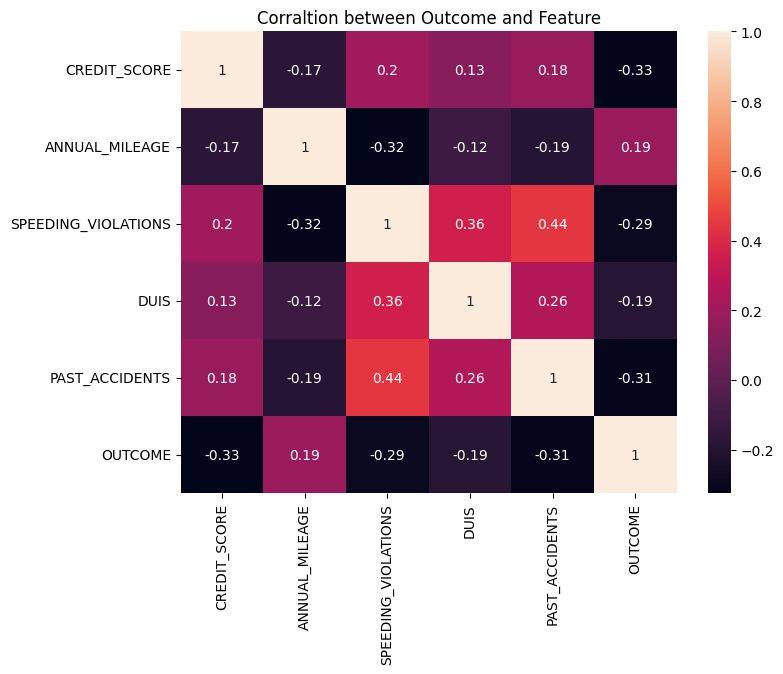

In [167]:
#Creating a heatmap for a better visualization
plt.figure(figsize=(8,6))
sns.heatmap(data[['CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','OUTCOME']].corr(),annot=True)
plt.title('Corraltion between Outcome and Feature')
plt.show()

Dari korelasi Numerical column yaitu ('CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS')

### Membuat variable baru Untuk Feature yang berkolerasi

In [168]:
# print list correlation
print('column katgorik:', list_cat)
print('column numerik:', list_num)

column katgorik: ['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'CITY']
column numerik: ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']


In [169]:
# memasukan variabel lagi berdasarkan fitur kategoris dan numerik yang relevan
X_train_cat = X_train_cat[list_cat]
X_train_num = X_train_num[list_num]

X_test_cat = X_test_cat[list_cat]
X_test_num = X_test_num[list_num]

In [170]:
# Checking the categorical data
X_train_cat

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,CITY
6800,very old,female,expert,university,upper class,1,before 2015,1,1,baltimore
43,young,male,newbie,none,poverty,0,before 2015,0,0,new york
809,young,male,newbie,high school,working class,1,before 2015,0,0,orlando
1896,old,male,amateure,university,upper class,1,after 2015,0,1,new york
3832,middle age,female,amateure,high school,working class,1,before 2015,0,1,new york
...,...,...,...,...,...,...,...,...,...,...
4590,old,male,advanced,high school,upper class,1,after 2015,1,1,new york
6651,middle age,male,amateure,high school,middle class,1,after 2015,0,1,new york
5481,middle age,male,amateure,none,poverty,0,before 2015,0,1,new york
8559,very old,male,expert,high school,upper class,1,before 2015,1,1,new york


In [171]:
# Checking the numerical data
X_train_num

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
6800,0.596371,11000.0,3,0.0,0
43,0.406482,16000.0,0,0.0,0
809,0.324986,15000.0,0,0.0,0
1896,0.528296,12000.0,1,0.0,4
3832,0.461583,15000.0,0,0.0,0
...,...,...,...,...,...
4590,0.501202,9000.0,3,0.0,5
6651,0.612998,14000.0,1,0.0,2
5481,0.019182,16000.0,3,0.0,1
8559,0.301620,10000.0,5,1.0,5


In [172]:
# Checking the numerical data
X_test_num

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
5320,0.019182,14000.0,0,0.000000,0
86,0.412452,14000.0,0,0.000000,0
6165,0.430061,15000.0,2,1.908504,2
3640,0.207277,11666.0,4,0.000000,4
7589,0.457546,9000.0,1,0.000000,2
...,...,...,...,...,...
445,0.019182,15000.0,0,0.000000,0
1920,0.474851,12000.0,3,1.000000,2
138,0.540183,11666.0,0,0.000000,1
4774,0.562342,10000.0,0,0.000000,0


In [173]:
# Checking the numerical data
X_test_cat

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,CITY
5320,middle age,female,newbie,university,upper class,1,after 2015,0,0,new york
86,young,female,newbie,none,poverty,0,before 2015,0,0,new york
6165,old,female,advanced,university,upper class,1,after 2015,0,0,new york
3640,middle age,male,amateure,none,working class,1,before 2015,1,1,new york
7589,very old,male,amateure,university,upper class,1,before 2015,1,1,new york
...,...,...,...,...,...,...,...,...,...,...
445,old,female,amateure,high school,middle class,1,before 2015,1,0,new york
1920,old,male,advanced,high school,middle class,0,before 2015,0,1,orlando
138,middle age,female,amateure,high school,middle class,1,before 2015,1,1,new york
4774,middle age,male,newbie,university,upper class,0,after 2015,0,1,new york


## Scaling and Encoding

### Scaling

In [174]:
# Scaling menggunakan Standar Scaler karena lebih cocok untuk model classification 

#Initialize the Standar Scaler
scaler = StandardScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num) ## only fit in train
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 6.58972181e-01, -2.61507660e-01,  1.01683271e+00,
        -4.54232740e-01, -6.92252256e-01],
       [-2.98429188e-01,  1.60272467e+00, -7.80489026e-01,
        -4.54232740e-01, -6.92252256e-01],
       [-7.09327949e-01,  1.22987820e+00, -7.80489026e-01,
        -4.54232740e-01, -6.92252256e-01],
       ...,
       [-2.25116262e+00,  1.60272467e+00,  1.01683271e+00,
        -4.54232740e-01,  4.00851005e-03],
       [-8.27138478e-01, -6.34354126e-01,  2.21504720e+00,
         1.56115296e+00,  2.78905158e+00],
       [ 6.10285832e-01, -1.42287694e-04,  2.21504720e+00,
         1.56115296e+00,  7.00269277e-01]])

### Encoding

In [175]:
# Copy biar tidak mengulang jika salah
X_train_cat_copy = X_train_cat.copy()
X_test_cat_copy = X_test_cat.copy()

In [176]:
X_train_cat_copy.nunique()

AGE                   4
GENDER                2
DRIVING_EXPERIENCE    4
EDUCATION             3
INCOME                4
VEHICLE_OWNERSHIP     2
VEHICLE_YEAR          2
MARRIED               2
CHILDREN              2
CITY                  4
dtype: int64

In [177]:
X_train_cat_copy

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,CITY
6800,very old,female,expert,university,upper class,1,before 2015,1,1,baltimore
43,young,male,newbie,none,poverty,0,before 2015,0,0,new york
809,young,male,newbie,high school,working class,1,before 2015,0,0,orlando
1896,old,male,amateure,university,upper class,1,after 2015,0,1,new york
3832,middle age,female,amateure,high school,working class,1,before 2015,0,1,new york
...,...,...,...,...,...,...,...,...,...,...
4590,old,male,advanced,high school,upper class,1,after 2015,1,1,new york
6651,middle age,male,amateure,high school,middle class,1,after 2015,0,1,new york
5481,middle age,male,amateure,none,poverty,0,before 2015,0,1,new york
8559,very old,male,expert,high school,upper class,1,before 2015,1,1,new york


In [178]:
tampilkan_nilai_unik(X_train_cat_copy)

,nama_kolom,nilai_unik,count_unik,cardinality
0,AGE,"[very old, young, old, middle age]",4,low
1,GENDER,"[female, male]",2,low
2,DRIVING_EXPERIENCE,"[expert, newbie, amateure, advanced]",4,low
3,EDUCATION,"[university, none, high school]",3,low
4,INCOME,"[upper class, poverty, working class, middle c...",4,low
5,VEHICLE_YEAR,"[before 2015, after 2015]",2,low
6,CITY,"[baltimore, new york, orlando, san diego]",4,low


In [179]:
# define type data  
ordinal_column = ['AGE', 'DRIVING_EXPERIENCE','INCOME','VEHICLE_YEAR']
nominal_column = ['GENDER','EDUCATION','VEHICLE_OWNERSHIP','MARRIED','CHILDREN','CITY']


In [180]:
# Encoding

ord_rank = [
    ["young","middle age", "old", "very old"],
    ["newbie","amateure","advanced","expert"],
    ["poverty","working class", "middle class",'upper class'],
    ['before 2015','after 2015']
]

X_train_cat_ord = X_train_cat_copy[ordinal_column]
X_train_cat_nom = X_train_cat_copy[nominal_column]


X_test_cat_ord = X_test_cat_copy[ordinal_column]
X_test_cat_nom = X_test_cat_copy[nominal_column]


In [181]:
X_train_cat_ord

,AGE,DRIVING_EXPERIENCE,INCOME,VEHICLE_YEAR
6800,very old,expert,upper class,before 2015
43,young,newbie,poverty,before 2015
809,young,newbie,working class,before 2015
1896,old,amateure,upper class,after 2015
3832,middle age,amateure,working class,before 2015
...,...,...,...,...
4590,old,advanced,upper class,after 2015
6651,middle age,amateure,middle class,after 2015
5481,middle age,amateure,poverty,before 2015
8559,very old,expert,upper class,before 2015


In [182]:
X_train_cat_nom

,GENDER,EDUCATION,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,CITY
6800,female,university,1,1,1,baltimore
43,male,none,0,0,0,new york
809,male,high school,1,0,0,orlando
1896,male,university,1,0,1,new york
3832,female,high school,1,0,1,new york
...,...,...,...,...,...,...
4590,male,high school,1,1,1,new york
6651,male,high school,1,0,1,new york
5481,male,none,0,0,1,new york
8559,male,high school,1,1,1,new york


In [183]:
# ordinal encoder
ord_ENC = OrdinalEncoder(categories=ord_rank)

X_train_ord = ord_ENC.fit_transform(X_train_cat_ord)
X_test_ord = ord_ENC.transform(X_test_cat_ord)

# onehot
onehot_ENC = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_ohe = onehot_ENC.fit_transform(X_train_cat_nom)
X_test_ohe = onehot_ENC.transform(X_test_cat_nom)



In [184]:
X_train_ord.shape

(7990, 4)

In [185]:
X_train_ord

array([[3., 3., 3., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 1., 0., 0.],
       [3., 3., 3., 0.],
       [3., 3., 3., 0.]])

In [186]:
X_train_ohe.shape

(7990, 15)

In [187]:
X_train_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [188]:
X_train_encoded = np.concatenate([X_train_ohe,X_train_ord],axis=1)
X_test_encoded =np.concatenate([X_test_ohe,X_test_ord],axis=1)

In [189]:
X_train_encoded.shape

(7990, 19)

### Concatenate Categorical and Numerical

In [190]:
# Concate
X_train_final = np.concatenate([X_train_num_scaled,X_train_encoded],axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_encoded],axis=1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [191]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.658972,-0.261508,1.016833,-0.454233,-0.692252,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0
1,-0.298429,1.602725,-0.780489,-0.454233,-0.692252,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.709328,1.229878,-0.780489,-0.454233,-0.692252,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.315744,0.111339,-0.181382,-0.454233,2.092791,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0
4,-0.020616,1.229878,-0.780489,-0.454233,-0.692252,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,0.179137,-1.007201,1.016833,-0.454233,2.789052,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,1.0
7986,0.742806,0.857032,-0.181382,-0.454233,0.700269,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0
7987,-2.251163,1.602725,1.016833,-0.454233,0.004009,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7988,-0.827138,-0.634354,2.215047,1.561153,2.789052,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0


In [192]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-2.251163,0.857032,-0.780489,-0.454233,-0.692252,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0
1,-0.268332,0.857032,-0.780489,-0.454233,-0.692252,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.179546,1.229878,0.417725,3.392140,0.700269,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,1.0
3,-1.302806,-0.013192,1.615940,-0.454233,2.092791,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,-0.040970,-1.007201,-0.181382,-0.454233,0.700269,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,-2.251163,1.229878,-0.780489,-0.454233,-0.692252,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0
1994,0.046278,0.111339,1.016833,1.561153,0.700269,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0
1995,0.375676,-0.013192,-0.780489,-0.454233,0.004009,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
1996,0.487402,-0.634354,-0.780489,-0.454233,-0.692252,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0


In [193]:
# checking sizes
print('X Ukuran train-set :', X_train_final.shape)
print('y Ukuran train-set :', y_train.shape)
print('')
print('X Ukuran test-set :', X_test_final.shape)
print('y Ukuran test-set :', y_test.shape)

X Ukuran train-set : (7990, 24)
y Ukuran train-set : (7990,)

X Ukuran test-set : (1998, 24)
y Ukuran test-set : (1998,)


<Figure size 640x480 with 0 Axes>

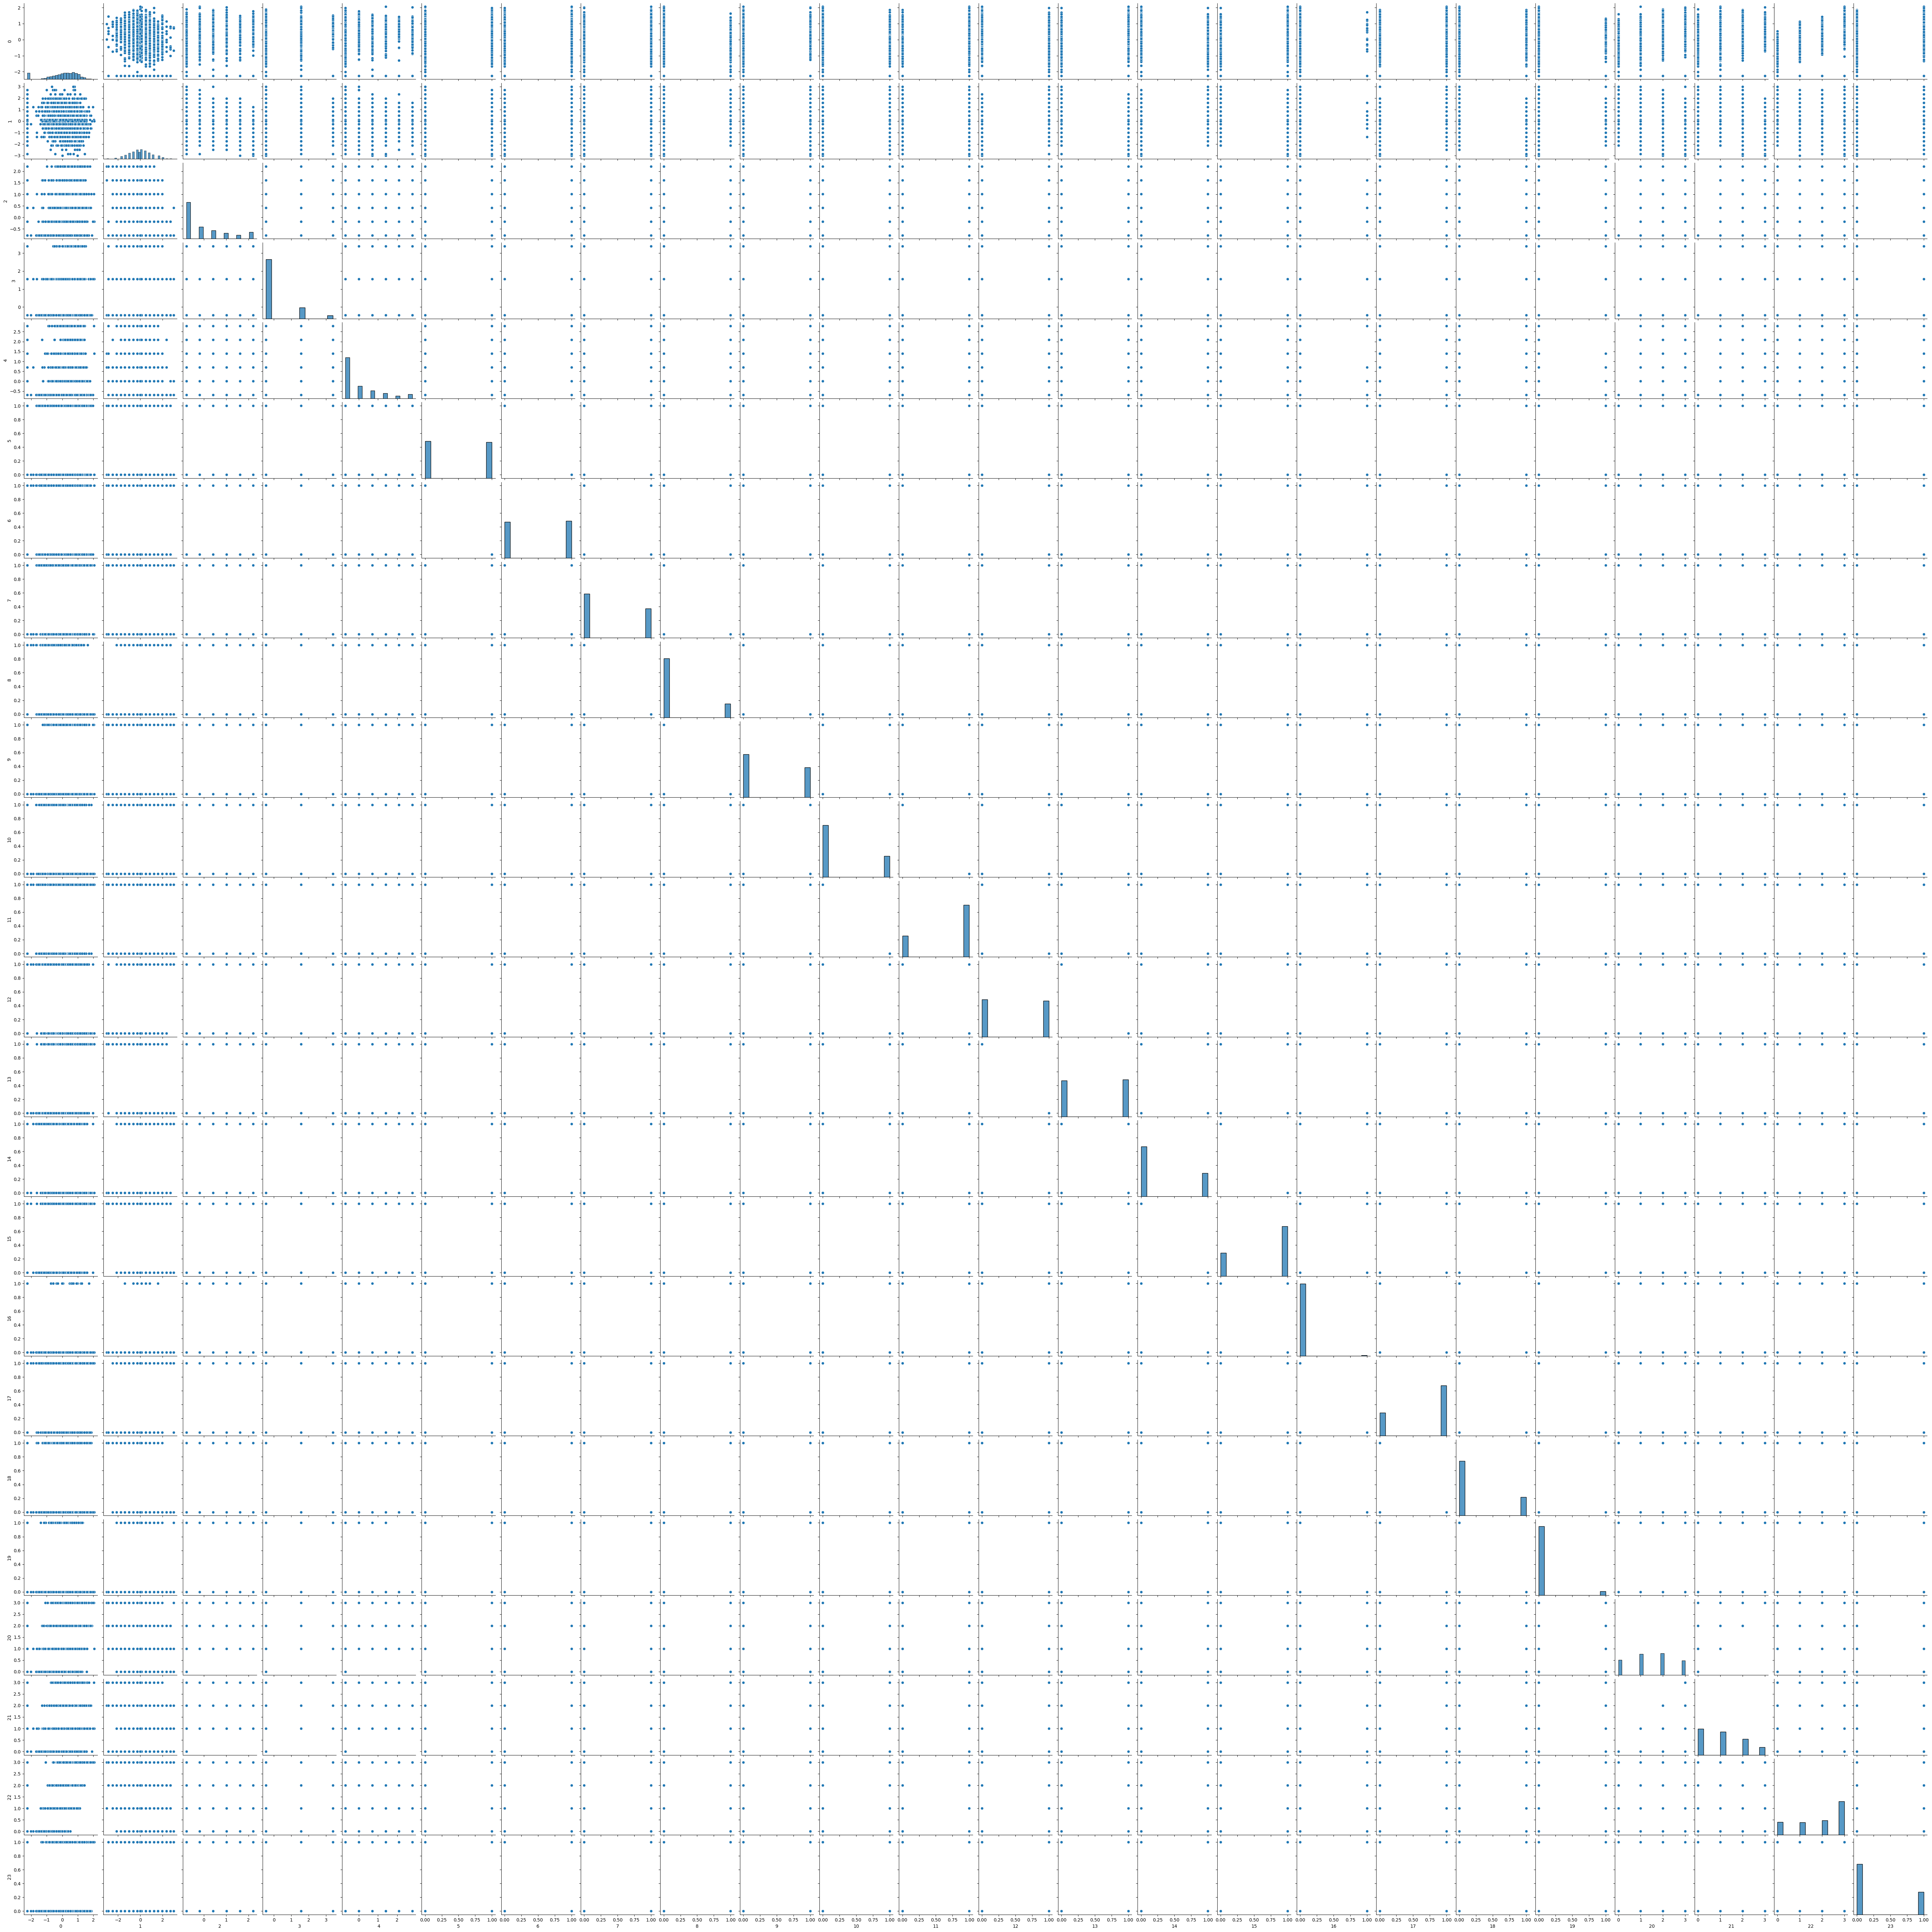

In [194]:
# checking distribution selected feature
plt.figure()
sns.pairplot(X_test_final)  
#Taking hue 
plt.show()

## Balancing dengan SMOTE

In [195]:
# Transfrom balanced into training dataset
overSampler = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=22)
X_train_final, y_train = overSampler.fit_resample(X_train_final,y_train)

In [196]:
counter = Counter(y_train)
print(counter)

Counter({1: 5482, 0: 5482})


Oke Data train sudah balance (seimbang)

---

# vi. Modeling 

Oke sebelum modeling alangkah baik memastikan lagi apa tujuan dari project ini sebagai berikut:
- target Outcome binary classification
- Model clasifikasi: KNN, SVM classifier, Decision Tree, Random Forest, Xgboost
- Matric: Fokus Precision karena mengurangi bias terhadap pengajuan klaim atau OUTCOME 1
- Bebarapa penyesuian model seperti cross validate, hyper parameter tuning, boosting dll.

## Baseline model

In [197]:
# definisi model knn
base_knn = KNeighborsClassifier()
# train model
base_knn.fit(X_train_final, y_train)


KNeighborsClassifier()

In [198]:
# definisi model SVC
base_SVC = SVC()
# Train model
base_SVC.fit(X_train_final, y_train)


SVC()

In [199]:
# definisi model Decision tree
base_dectree = DecisionTreeClassifier()
# Train model
base_dectree.fit(X_train_final, y_train)

DecisionTreeClassifier()

In [200]:
# definisi model random forest
base_randFo =  RandomForestClassifier()
# Train model
base_randFo.fit(X_train_final, y_train)

RandomForestClassifier()

In [201]:
# Definisi Model Xgboost
base_xgb = XGBClassifier()
# Train model
base_xgb.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

Dalam model evalution tergantung pada konteks dari tujan tersebut. untuk Metric Evaluasi model untuk kasus Car Insurence (Claim loan/No claim loan) adalah `Precision`

Dengan pemahaman tentang dataset yang disediakan, tujuan bisnis yang mungkin termasuk:

1. **Minimizing Losses**: Mengurangi kerugian bagi perusahaan asuransi adalah salah satu tujuan utama. Dengan menggunakan model evaluasi yang dapat mengidentifikasi klaim pinjaman yang valid dengan tepat (maksimalkan precision), perusahaan dapat mengurangi pembayaran klaim yang tidak perlu.
2. **Maximizing Revenue**: Maksimalkan pendapatan dari premi asuransi dengan memastikan bahwa klaim yang valid tidak terlewat (maksimalkan recall). Ini membantu memastikan bahwa perusahaan tidak kehilangan pendapatan karena klaim yang sebenarnya valid tidak diidentifikasi.
3. **Improving Customer Satisfaction**: Meningkatkan kepuasan pelanggan dengan memberikan layanan yang cepat dan tepat. Dengan menggunakan model yang dapat mengidentifikasi klaim pinjaman dengan akurat, perusahaan dapat memproses klaim dengan lebih efisien, meningkatkan kepuasan pelanggan.
4. **Risk Management**: Mengelola risiko dengan memprediksi klaim pinjaman secara akurat. Model yang memiliki keseimbangan baik antara precision dan recall (F1 score yang baik) akan membantu perusahaan dalam mengelola risiko dengan lebih baik.

Dengan memahami tujuan bisnis ini, Anda dapat memilih metrik evaluasi yang paling sesuai untuk mengevaluasi model klasifikasi klaim pinjaman dalam dataset ini.

**Target:**

**Yes = 1**  
**No = 0**

In [202]:
# Model Evaluation Utilities

# fungsi evaluasi
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  # print('Accuracy Score - : ', accuracy_score(y, y_pred)) # metric Accuracy score
  print('Precision Score - : ', precision_score(y, y_pred)) # metric precision score
  # print('Recall Score - : ', recall_score(y, y_pred)) # metric recall score
  # print('F1 Score - : ', f1_score(y, y_pred)) # metric f1 score
  print('Jumlah class - : ' , Counter(y_pred),'\n')
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred))


# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  """ fungsi metric scoring """
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports





# function ROC-AUC Curve
def perform_roc_auc(clf, X, y):
    """
    Menampilkan ROC Curve dan menghitung AUC Score untuk model klasifikasi.
    
    Parameters:
        clf : classifier object
            Model klasifikasi yang telah dilatih.
        X : array-like
            Data fitur untuk evaluasi.
        y : array-like
            Ground truth labels.

    Returns:
        None
    """
    y_pred_proba = clf.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc_model = roc_auc_score(y, y_pred_proba)

    print("AUC Score:", auc_model)

    plt.figure().clf()
    plt.grid()
    plt.plot(fpr, tpr, label=f'{clf.__class__.__name__}, AUC = {auc_model:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

  

KNN model - Train
Precision Score - :  0.8519832312157368
Jumlah class - :  Counter({1: 6202, 0: 4762}) 



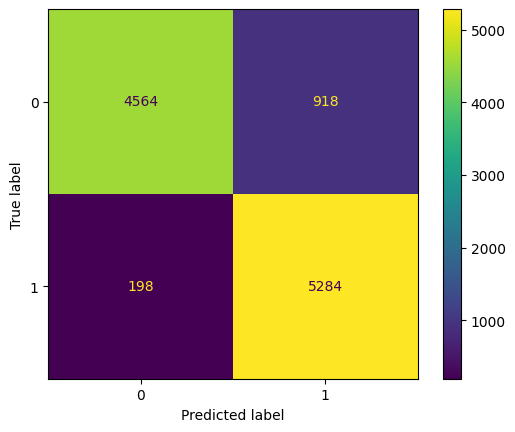

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5482
           1       0.85      0.96      0.90      5482

    accuracy                           0.90     10964
   macro avg       0.91      0.90      0.90     10964
weighted avg       0.91      0.90      0.90     10964


KNN model - Test
Precision Score - :  0.6119760479041916
Jumlah class - :  Counter({0: 1163, 1: 835}) 



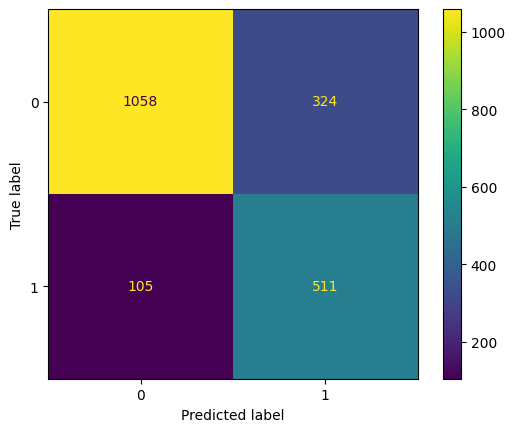

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1382
           1       0.61      0.83      0.70       616

    accuracy                           0.79      1998
   macro avg       0.76      0.80      0.77      1998
weighted avg       0.82      0.79      0.79      1998

KNN - ROC-Curve
AUC Score: 0.8623595109666022


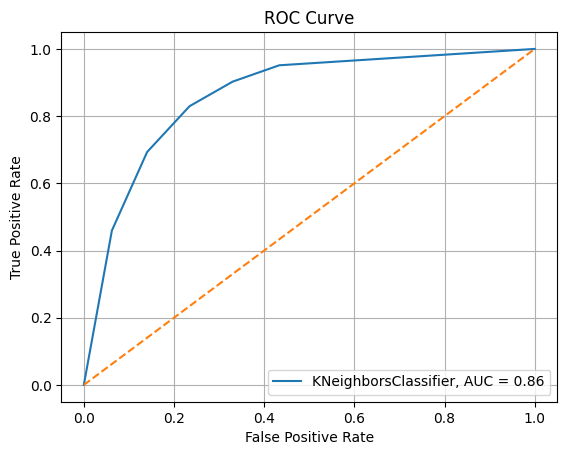

In [203]:
# Evaluasi model KNN
print('KNN model - Train')

performance_check(base_knn, X_train_final, y_train)
print('')

print('KNN model - Test')
performance_check(base_knn, X_test_final, y_test)

print('KNN - ROC-Curve')
perform_roc_auc(base_knn, X_test_final, y_test)


SVM classifier model - Train
Precision Score - :  0.8449216087252897
Jumlah class - :  Counter({1: 5868, 0: 5096}) 



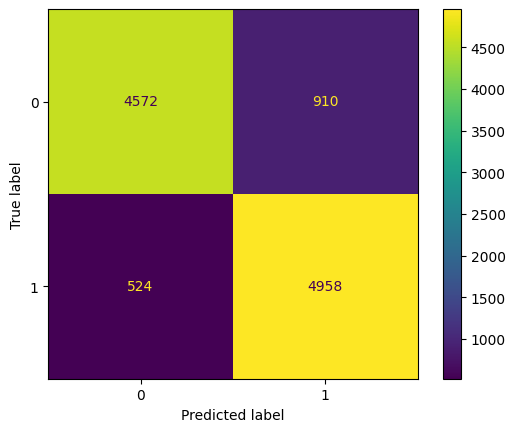

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5482
           1       0.84      0.90      0.87      5482

    accuracy                           0.87     10964
   macro avg       0.87      0.87      0.87     10964
weighted avg       0.87      0.87      0.87     10964


SVM classifier model - Test
Precision Score - :  0.6938239159001314
Jumlah class - :  Counter({0: 1237, 1: 761}) 



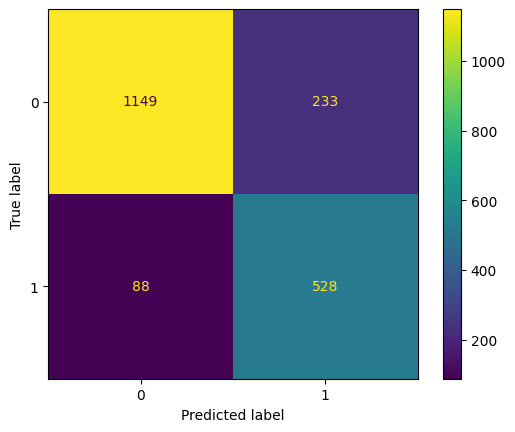

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1382
           1       0.69      0.86      0.77       616

    accuracy                           0.84      1998
   macro avg       0.81      0.84      0.82      1998
weighted avg       0.86      0.84      0.84      1998



In [204]:
# Evaluasi model SVM classifier
print('SVM classifier model - Train')
performance_check(base_SVC, X_train_final, y_train)
print('')

print('SVM classifier model - Test')
performance_check(base_SVC, X_test_final, y_test)

# print("SVM classifier ROC-Curve")
# perform_roc_auc(base_SVC, X_test_final, y_test)

Decision Tree - Train
Precision Score - :  1.0
Jumlah class - :  Counter({0: 5486, 1: 5478}) 



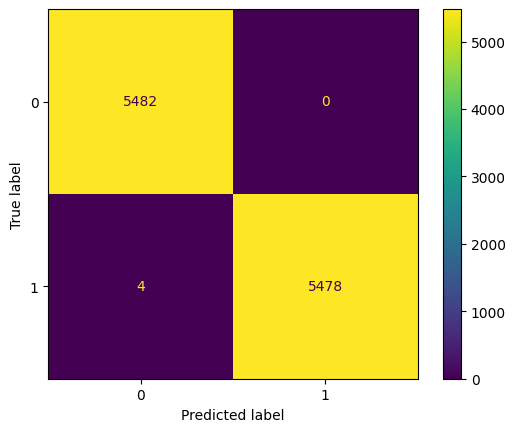

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5482
           1       1.00      1.00      1.00      5482

    accuracy                           1.00     10964
   macro avg       1.00      1.00      1.00     10964
weighted avg       1.00      1.00      1.00     10964


Decision Tree - Test
Precision Score - :  0.6621417797888386
Jumlah class - :  Counter({0: 1335, 1: 663}) 



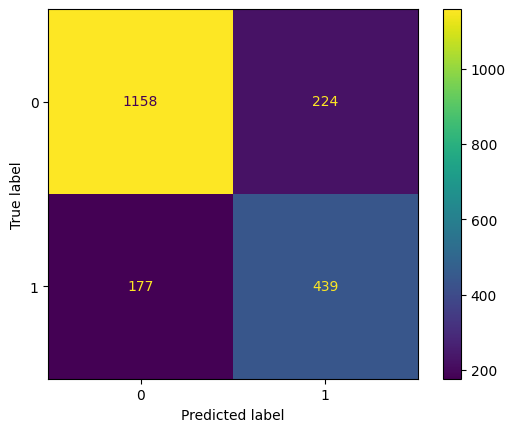

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1382
           1       0.66      0.71      0.69       616

    accuracy                           0.80      1998
   macro avg       0.76      0.78      0.77      1998
weighted avg       0.80      0.80      0.80      1998

Decision Tree  ROC-Curve
AUC Score: 0.7759693273441465


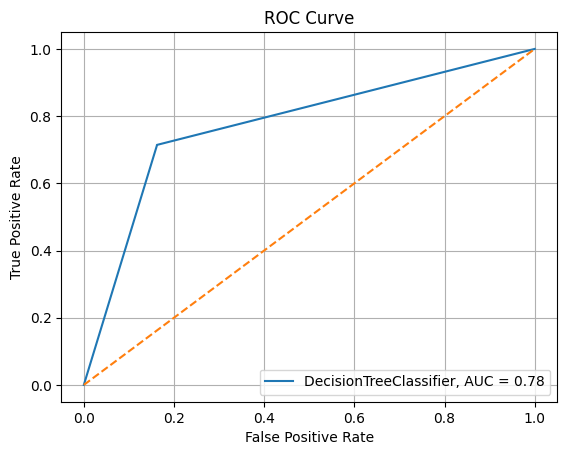

In [205]:
# Evaluasi model Decision Tree
print('Decision Tree - Train')
performance_check(base_dectree, X_train_final, y_train)
print('')

print('Decision Tree - Test')
performance_check(base_dectree, X_test_final, y_test)

print("Decision Tree  ROC-Curve")
perform_roc_auc(base_dectree, X_test_final, y_test)

Dari klasifikasi report memiliki 1.00. jelas overfitting dilihat dari test yang true positive 0.67

Random forest classifier model - Train
Precision Score - :  0.99945295404814
Jumlah class - :  Counter({1: 5484, 0: 5480}) 



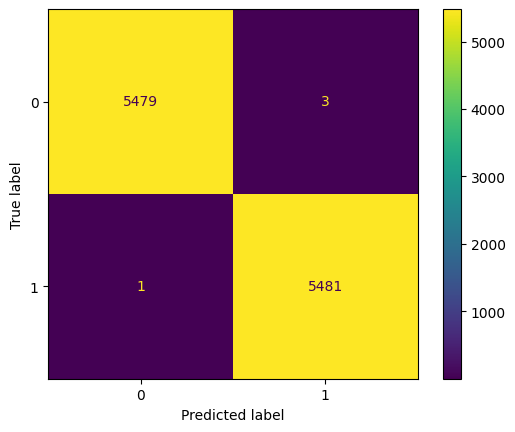

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5482
           1       1.00      1.00      1.00      5482

    accuracy                           1.00     10964
   macro avg       1.00      1.00      1.00     10964
weighted avg       1.00      1.00      1.00     10964


Random forest classifier model - Test
Precision Score - :  0.7411003236245954
Jumlah class - :  Counter({0: 1380, 1: 618}) 



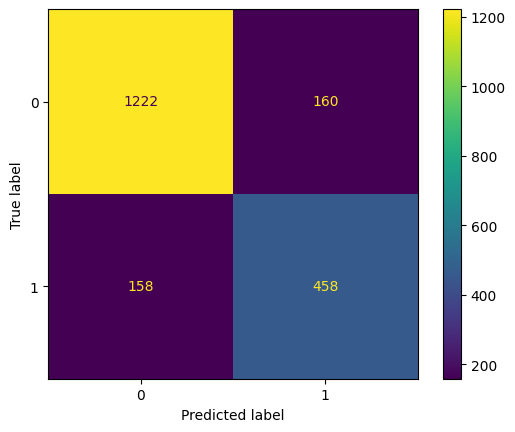

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1382
           1       0.74      0.74      0.74       616

    accuracy                           0.84      1998
   macro avg       0.81      0.81      0.81      1998
weighted avg       0.84      0.84      0.84      1998

Random forest classifier ROC-Curve
AUC Score: 0.9029568477831864


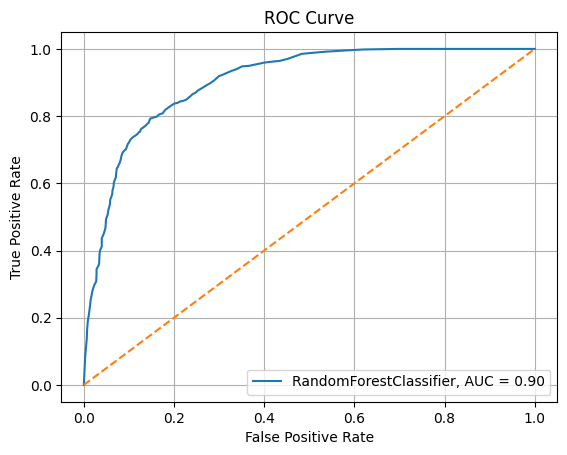

In [206]:
# Evaluasi model Random forest
print('Random forest classifier model - Train')
performance_check(base_randFo, X_train_final, y_train)
print('')

print('Random forest classifier model - Test')
performance_check(base_randFo, X_test_final, y_test)

print('Random forest classifier ROC-Curve')
perform_roc_auc(base_randFo, X_test_final, y_test)

Sama dengan random forest overfitting tapi di test memiliki proporsi selisih lebih sedikit

Xgboost classifier - Train
Precision Score - :  0.9410503751339764
Jumlah class - :  Counter({1: 5598, 0: 5366}) 



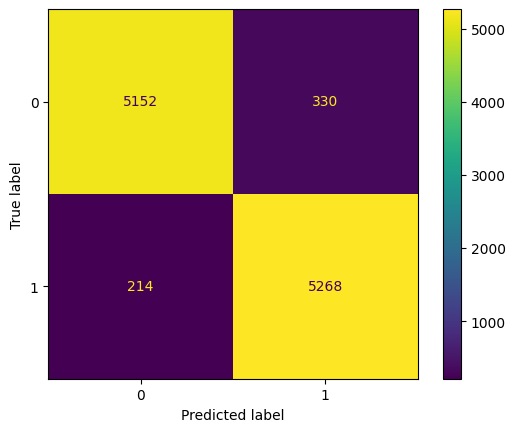

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5482
           1       0.94      0.96      0.95      5482

    accuracy                           0.95     10964
   macro avg       0.95      0.95      0.95     10964
weighted avg       0.95      0.95      0.95     10964


Xgboost classifier - Test
Precision Score - :  0.7136498516320475
Jumlah class - :  Counter({0: 1324, 1: 674}) 



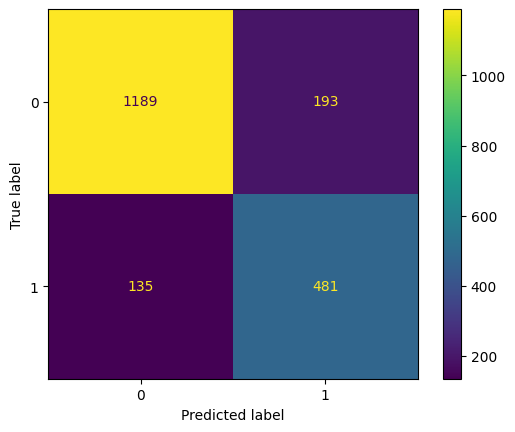

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1382
           1       0.71      0.78      0.75       616

    accuracy                           0.84      1998
   macro avg       0.81      0.82      0.81      1998
weighted avg       0.84      0.84      0.84      1998

Xgboost classifier ROC-Curve
AUC Score: 0.9100147771909711


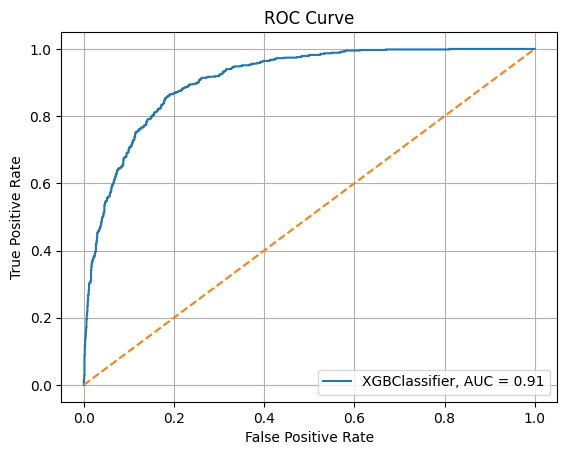

In [207]:
# Evaluasi model Xgboost
print('Xgboost classifier - Train')

performance_check(base_xgb, X_train_final, y_train)
print('')

print('Xgboost classifier - Test')
performance_check(base_xgb, X_test_final, y_test)

print('Xgboost classifier ROC-Curve')
perform_roc_auc(base_xgb, X_test_final, y_test)

### Cross Validate Score Base Model


Dari sini saya harus memastikan bahwa model adalah balance atau pun tidak bias dan tidak overfitting. dengan menggunakan cross_val_score untuk metodenya
dan mencoba ke semua model untuk melihat nilai stabil dari model.

In [208]:
# function Cross validate
def perform_cross_validation(models, X_train_final, y_train, scoring='accuracy'):
    # results = {}
    num_folds = 5
    for model_name, model in models.items():
        kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=22)
        # Lakukan cross-validation untuk setiap model
        cross_val_scores = cross_val_score(model, X_train_final, y_train, cv=kf, scoring=scoring)
        
        # # Simpan hasil cross-validation
        # results[model_name] = cross_val_scores
        
        # Tampilkan hasil
        print(f'{model_name} - {scoring} score - All - Cross validation: {cross_val_scores}')
        print(f'{model_name} - {scoring} score - Mean - Cross Validation: {cross_val_scores.mean()}')
        print(f'{model_name} - {scoring} score - Std - Cross Validation: {cross_val_scores.std()}')        
        print('-----')

        
    # return results

# Definisikan model evaluasi
models = {
    'K-Nearest Neighbors': base_knn,
    'Support Vector Classifier': base_SVC,
    'Decision Tree': base_dectree,
    'Random Forest': base_randFo,
    'XGBoost': base_xgb
}

# Panggil fungsi perform_cross_validation
perform_cross_validation(models, X_train_final, y_train, scoring='precision')

K-Nearest Neighbors - precision score - All - Cross validation: [0.80175159 0.80493631 0.79097387 0.80691874 0.80159363]
K-Nearest Neighbors - precision score - Mean - Cross Validation: 0.8012348280585979
K-Nearest Neighbors - precision score - Std - Cross Validation: 0.005508009696528151
-----
Support Vector Classifier - precision score - All - Cross validation: [0.83347566 0.83706897 0.82549187 0.84739983 0.82572614]
Support Vector Classifier - precision score - Mean - Cross Validation: 0.8338324942633317
Support Vector Classifier - precision score - Std - Cross Validation: 0.008123466985358624
-----
Decision Tree - precision score - All - Cross validation: [0.83996463 0.84442446 0.83935018 0.84018265 0.83879781]
Decision Tree - precision score - Mean - Cross Validation: 0.8405439473229256
Decision Tree - precision score - Std - Cross Validation: 0.001999929197452799
-----
Random Forest - precision score - All - Cross validation: [0.87742504 0.89069557 0.86375779 0.88288288 0.8718638

In [209]:
# penggunaan fungsi performance_report 
all_reports = {}

# Melakukan laporan kinerja untuk model KNN
all_reports = performance_report(all_reports, y_train, base_knn.predict(X_train_final), y_test, base_knn.predict(X_test_final), 'KNN')

# Melakukan laporan kinerja untuk model SVC
all_reports = performance_report(all_reports, y_train, base_SVC.predict(X_train_final), y_test, base_SVC.predict(X_test_final), 'SVC')

# Melakukan laporan kinerja untuk model Decision Tree
all_reports = performance_report(all_reports, y_train,base_dectree.predict(X_train_final), y_test, base_dectree.predict(X_test_final), 'Decision Tree')

# Melakukan laporan kinerja untuk model Random Forest
all_reports = performance_report(all_reports, y_train, base_randFo.predict(X_train_final), y_test, base_randFo.predict(X_test_final), 'Random Forest')

# Melakukan laporan kinerja untuk model XGBoost
all_reports = performance_report(all_reports, y_train, base_xgb.predict(X_train_final), y_test, base_xgb.predict(X_test_final), 'XGBoost')

# Membuat DataFrame dari dictionary all_reports
df_report_base_model = pd.DataFrame(all_reports)

# Melihat semua laporan kinerja
print(all_reports)


{'KNN': {'train - precision': 0.8519832312157368, 'train - recall': 0.9638817949653411, 'train - accuracy': 0.8982123312659613, 'train - f1_score': 0.9044847654912701, 'test - precision': 0.6119760479041916, 'test - recall': 0.8295454545454546, 'test - accuracy_score': 0.7852852852852853, 'test - f1_score': 0.70434183321847}, 'SVC': {'train - precision': 0.8449216087252897, 'train - recall': 0.9044144472820138, 'train - accuracy': 0.8692083181320686, 'train - f1_score': 0.8736563876651983, 'test - precision': 0.6938239159001314, 'test - recall': 0.8571428571428571, 'test - accuracy_score': 0.8393393393393394, 'test - f1_score': 0.7668845315904139}, 'Decision Tree': {'train - precision': 1.0, 'train - recall': 0.9992703392922291, 'train - accuracy': 0.9996351696461145, 'train - f1_score': 0.9996350364963503, 'test - precision': 0.6621417797888386, 'test - recall': 0.7126623376623377, 'test - accuracy_score': 0.7992992992992993, 'test - f1_score': 0.6864738076622361}, 'Random Forest': {'

In [210]:
df_report_base_model

,KNN,SVC,Decision Tree,Random Forest,XGBoost
train - precision,0.851983,0.844922,1.000000,0.999453,0.941050
train - recall,0.963882,0.904414,0.999270,0.999818,0.960963
train - accuracy,0.898212,0.869208,0.999635,0.999635,0.950383
train - f1_score,0.904485,0.873656,0.999635,0.999635,0.950903
test - precision,0.611976,0.693824,0.662142,0.741100,0.713650
test - recall,0.829545,0.857143,0.712662,0.743506,0.780844
test - accuracy_score,0.785285,0.839339,0.799299,0.840841,0.835836
test - f1_score,0.704342,0.766885,0.686474,0.742301,0.745736


**Kesimpulan**  
Dari model evaluasi berdasarkan metric precision Random forest lebih unggul dari yang lain nya dengan prediksi test `75%` dan cross_val_score berdasarkan rata-rata `88%`. dari model random forest dan decision tree memiliki report 100% di training saya asumsikan overfitting karena data nya terlalu balance, sehingga harus melakukan beberapa penyesuian hyper tuning.
Rekap Precision:

Model | Train | Test | Cross Val
--- | --- | --- | ---
KNN | 85% | 61% | 80%
SVC | 84% | 69% | 83%
Decision Tree | 100% | 67% | 83%
Random Forest | 99% | 74% | 88%
XGBoost | 94% | 71% | 87%

Overall karena Random forest terbaik jadi selanjutnya tunning model random forest

## Hyperparameter Tuning


Mencari nilai parameter terbaik 

In [211]:
# Look at parameters used by our current forest

from pprint import pprint
print('Parameters currently in use:\n')
pprint(base_randFo.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Random forest yang akan kita adjust adalah sebagai berikut:
- n_estimator  = number of trees in the foreset
- max_feature = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

### **Random SearchCV Tuning**

In [212]:
# Random Search tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [213]:
# Random Search Training

# initiate kfold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=22)

rf_randomSearch = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=22),
                                param_distributions = random_grid,
                                n_iter = 100, cv = kf,
                                verbose=2, 
                                random_state=42,
                                n_jobs = -1)

# trainig
rf_randomSearch.fit(X_train_final, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=22, shuffle=True),
                   estimator=RandomForestClassifier(random_state=22),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [214]:
# Get Best Params
rf_randomSearch.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [215]:
rf_random = rf_randomSearch.best_estimator_

In [216]:
# common evaluate
def evaluate_classifier(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    # recall = recall_score(test_labels, predictions)
    # f1 = f1_score(test_labels, predictions)
    
    print('Model Performance')
    print('Accuracy: {:.2f}'.format(accuracy))
    # print('Recall: {:.2f}'.format(recall))
    # print('F1-score: {:.2f}'.format(f1))
    
    return accuracy

In [217]:
# base model
base = evaluate_classifier(base_randFo, X_test_final, y_test)

Model Performance
Accuracy: 0.84


In [218]:
# random model
randomGrid = evaluate_classifier(rf_random, X_test_final, y_test)

Model Performance
Accuracy: 0.85


In [219]:
# show improvement
print('Improvement of {:0.2f}%.'.format( 100 * (randomGrid - base) / base))

Improvement of 0.95%.


In [220]:
models = {
    "Random forest":rf_random
}

perform_cross_validation(models, X_train_final, y_train, scoring="precision")

Random forest - precision score - All - Cross validation: [0.87369338 0.88099467 0.8679078  0.8912656  0.86602452]
Random forest - precision score - Mean - Cross Validation: 0.8759771936298639
Random forest - precision score - Std - Cross Validation: 0.009255236421665602
-----


Penjelasan:

Di lihat dari confusion matrix train-test lebih general namun dalam performence model menurun. dalam hal ini saya akan menggunakan kedua nya di satukan

### **Grid SearchCV Tuning**

In [221]:
param_grid = {
    'max_depth': [20,30,50, 80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [4,8, 10],
    'n_estimators': [200,300,400,500,600,700,800]
}
param_grid

{'max_depth': [20, 30, 50, 80],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [4, 8, 10],
 'n_estimators': [200, 300, 400, 500, 600, 700, 800]}

In [222]:
# Train with Grid Search

# Model Random forest
randfo_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=22),
                         param_grid=param_grid,
                         cv=kf,
                         n_jobs=-1,
                         verbose=2,
                         scoring='precision')

randfo_grid_search.fit(X_train_final, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=22, shuffle=True),
             estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 80],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 8, 10],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800]},
             scoring='precision', verbose=2)

In [223]:
# Get Best Hyperparameters
randfo_grid_search.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 600}

In [224]:
# memasukan model dengan parameter terbaik
randfo_tuned = randfo_grid_search.best_estimator_

In [225]:
# base model
base_accuracy = evaluate_classifier(base_randFo, X_test_final, y_test)

Model Performance
Accuracy: 0.84


In [226]:
# tuned model
tuned_accuracy = evaluate_classifier(randfo_tuned, X_test_final, y_test)

Model Performance
Accuracy: 0.85


In [227]:
print('Improvement of {:0.2f}%.'.format( 100 * (tuned_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.95%.


In [228]:
model = {
    "Random forest":randfo_tuned
}

perform_cross_validation(model, X_train_final, y_train, scoring="precision")

Random forest - precision score - All - Cross validation: [0.87228497 0.88067676 0.86383731 0.88672566 0.86149826]
Random forest - precision score - Mean - Cross Validation: 0.8730045923886941
Random forest - precision score - Std - Cross Validation: 0.009634132585737965
-----


#### Sebelum Tunning

Random Forest - Train
Precision Score - :  0.99945295404814
Jumlah class - :  Counter({1: 5484, 0: 5480}) 



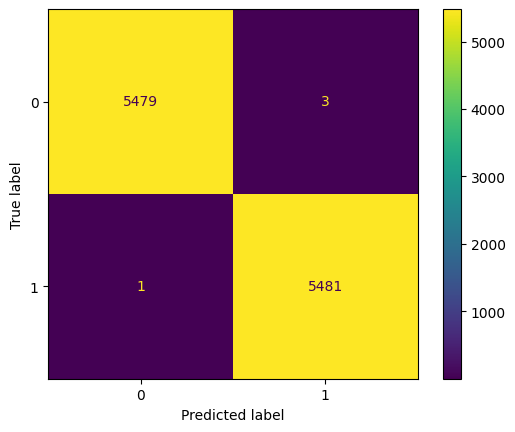

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5482
           1       1.00      1.00      1.00      5482

    accuracy                           1.00     10964
   macro avg       1.00      1.00      1.00     10964
weighted avg       1.00      1.00      1.00     10964


Random Forest - Test
Precision Score - :  0.7411003236245954
Jumlah class - :  Counter({0: 1380, 1: 618}) 



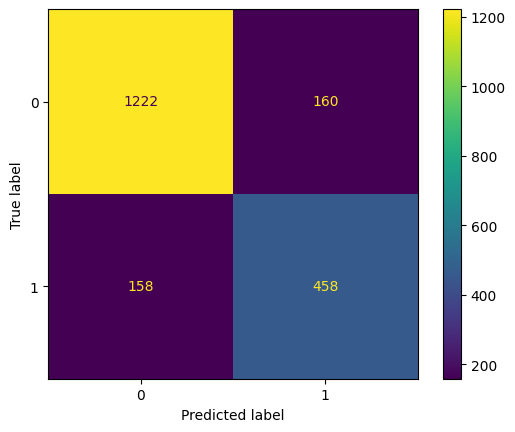

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1382
           1       0.74      0.74      0.74       616

    accuracy                           0.84      1998
   macro avg       0.81      0.81      0.81      1998
weighted avg       0.84      0.84      0.84      1998



In [229]:
# Evaluasi model random forest
print('Random Forest - Train')

performance_check(base_randFo, X_train_final, y_train)
print('')

print('Random Forest - Test')
performance_check(base_randFo, X_test_final, y_test)

AUC Score: 0.9029568477831864


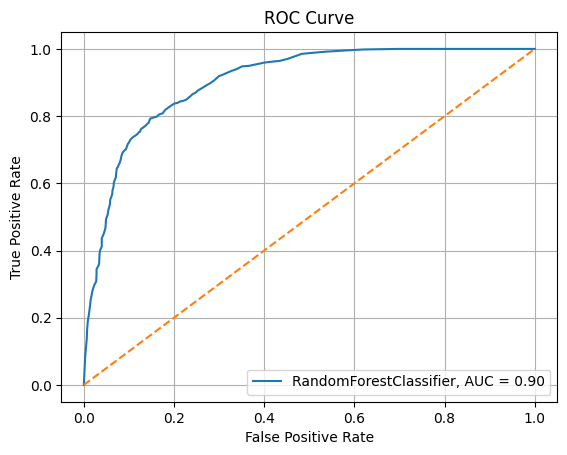

In [230]:
perform_roc_auc(base_randFo, X_test_final, y_test)

In [231]:
base_rf = {
    "Random forest":base_randFo
}

perform_cross_validation(base_rf, X_train_final, y_train, scoring="precision")

Random forest - precision score - All - Cross validation: [0.87588028 0.8908927  0.87195672 0.88520179 0.87344029]
Random forest - precision score - Mean - Cross Validation: 0.8794743549006977
Random forest - precision score - Std - Cross Validation: 0.007335179604757937
-----


#### Sesudah Tunning

Random Forest - Train
Precision Score - :  0.9355926188786373
Jumlah class - :  Counter({1: 5636, 0: 5328}) 



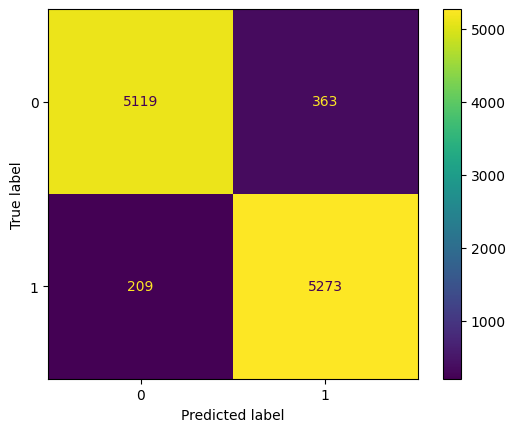

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5482
           1       0.94      0.96      0.95      5482

    accuracy                           0.95     10964
   macro avg       0.95      0.95      0.95     10964
weighted avg       0.95      0.95      0.95     10964


Random Forest - Test
Precision Score - :  0.7415384615384616
Jumlah class - :  Counter({0: 1348, 1: 650}) 



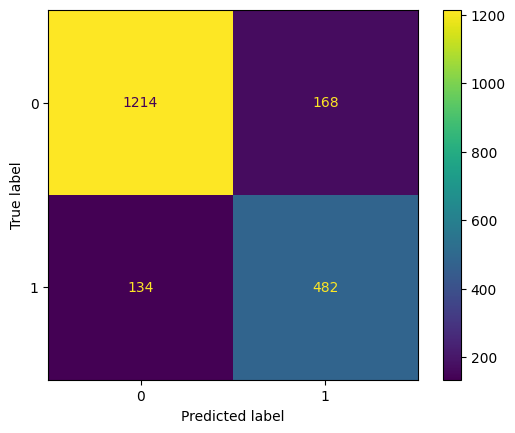

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1382
           1       0.74      0.78      0.76       616

    accuracy                           0.85      1998
   macro avg       0.82      0.83      0.83      1998
weighted avg       0.85      0.85      0.85      1998



In [232]:
# Evaluasi model random forest
print('Random Forest - Train')

performance_check(randfo_tuned, X_train_final, y_train)
print('')

print('Random Forest - Test')
performance_check(randfo_tuned, X_test_final, y_test)

In [233]:
rf_tuned = {
    "Random forest":randfo_tuned
}

perform_cross_validation(rf_tuned, X_train_final, y_train, scoring="precision")

Random forest - precision score - All - Cross validation: [0.87228497 0.88067676 0.86383731 0.88672566 0.86149826]
Random forest - precision score - Mean - Cross Validation: 0.8730045923886941
Random forest - precision score - Std - Cross Validation: 0.009634132585737965
-----


**Kesimpulan**

Dari hasil tunnnig dan hasil sebelum base model tidak ada peningkatan signifikan, namun perlu di, bahwa model dianggap overfiting karena confusion matrix 100% (tidak general) dengan tuned model lebih general

# Build Model dengan pipeline

In [234]:
# Split data ke train dan test 
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
# handling  outlier

# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=listCols_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped_pipe = winsorizer_normal_dist.fit_transform(X_train_pipe)

# Transforming X_test
X_test_capped_pipe = winsorizer_normal_dist.transform(X_test_pipe)

In [236]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_pipe = winsorizer_skewed.fit_transform(X_train_capped_pipe)

# Transforming X_test
X_test_pipe = winsorizer_skewed.transform(X_test_capped_pipe)

In [237]:
ord_rank

[['young', 'middle age', 'old', 'very old'],
 ['newbie', 'amateure', 'advanced', 'expert'],
 ['poverty', 'working class', 'middle class', 'upper class'],
 ['before 2015', 'after 2015']]

In [238]:
# Membuat transformer pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', scaler)                 # standarisasi fitur
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', ord_ENC)

])

nominal_transformer = Pipeline(steps=[
    ('onehot', onehot_ENC)
])


# Gabungkan transformer untuk semua kolom menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list_num),
        ('ord', ordinal_transformer, ordinal_column),
        ('nom', nominal_transformer, nominal_column)
    ])


# Gabungkan preprocessor dengan SMOTE dan model classifier dalam pipeline
rf_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', overSampler),
    ('random forest', randfo_tuned)  # Model 
])

In [239]:
# training model
rf_pipe.fit(X_train_pipe, y_train_pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['young',
                                                                                               'middle '
                                                                                               'age',
                                                                                               'old',
                                                                                               'very '
                                                                                               'old'],
                                                                                              ['newbie',
                                                                                               'amateure',...
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GENDER', 'EDUCATION',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'CITY'])])),
                ('smote', SMOTE(random_state=22, sampling_strategy='minority')),
                ('random forest',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        min_samples_split=4, n_estimators=600,
                                        random_state=22))])

In [240]:
# Predict 
randfo_predictions = rf_pipe.predict(X_test_pipe)
randfo_predictions

array([0, 1, 1, ..., 0, 1, 1])

In [241]:
test_precision = precision_score(y_test_pipe, randfo_predictions)
print('precision_score', test_precision)

precision_score 0.7556904400606981


In [242]:
Counter(y_test_pipe)

Counter({0: 1367, 1: 631})

In [243]:
Counter(randfo_predictions)

Counter({0: 1339, 1: 659})

In [244]:
list_cat

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'CITY']

In [245]:
list_num

['CREDIT_SCORE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

## Model saving

In [246]:
with open('model/model.pkl', 'wb') as file_model:
  pickle.dump(rf_pipe, file_model)

with open('model/feature_num.txt', 'w') as file_1:
  json.dump(list_num, file_1)

with open('model/feature_cat.txt', 'w') as file_2:
  json.dump(list_cat, file_2)

# vii. **Kesimpulan**

Model analisis  

Setalah mencoba berbagai model klasifikasi dari KNN, SVM Classifier, Decsion Tree, dan Xgboost classifier. Model yang lebih unggul adalah Random forest berdasarkan hasil train , test, dan cross validate dengan membandingkan rata-rata model. saya telah melakukan oversampling dengan SMOTE dan melakukan Hyperparmater dengan menggunakan grid search.
Dengan demikian bahwa Random forest model yang cocok untuk data ini. hasil metric precision sebelum dan sesudah adalah sama yaitu train 99%, test 75%, dan mean stabil 88%. model dapat di tinggkatkan dengan algoritma lain yang mana fokus mengurangi overfitting dan imbalanced.

Data analisis  

Dari datasets 31.3% orang yang mengajukan claim dan 68.7% yang tidak mengajukan claim. mobil yang di asuransikan adalah sedan yang mana lebih banyak dari pada sport car di tahun sebelum 2015

Dari data lebih banyak tidak mengajukan claim dari pada yang claim. Outcome 0 lebih unggul di kasus seperti usia 40-64 (old), memiliki pengasilan stabil dan punya kendaraan sendiri. sedangkan Outcome 1 unggul dalam rentang usia 16-25 , penghasilan tidak stabil, dan bukan pemilik kendaraan. berdasarkan claim outcome 1 berkaitan dengan catatan past_accident, DUIS , dan speed_violations.

Dengan demikian saya fokus mengurangi bias dalam model saya pada outcome 1 dengan menggunakan metric precision